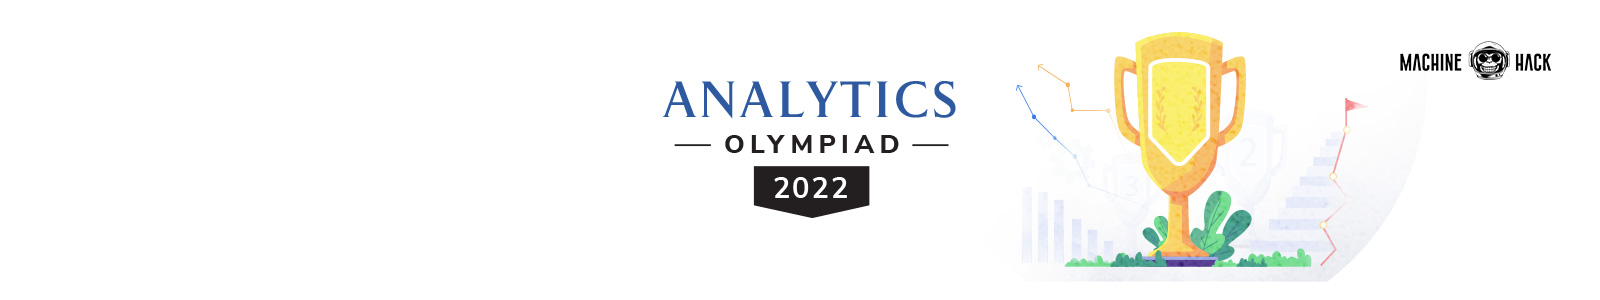

**Name**: Mahesh Chandra Duddu

**PhNo**: 9440642368

**Email**: duddumaheshchandra@gmail.com

Thanks to @MachineHack and @Shiv Nadar Institution of Eminence for this wonderful opportunity.

**Problem**: You are given a rich dataset consisting of thousands of rows of past records, which you can use to learn more about your customers’ behaviours. For example, you are supposed to create an ML model to look at a case of an insurance claim and decide whether to reject or accept it. Log_loss is given as evaluation metric.


Columns: ['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED','CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS','DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE']

 Learn and predict the OUTCOME variable.
 
 My Rank #25 approach(0.68081): 
 * OneHot Encoding of ['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'TYPE_OF_VEHICLE'] features, creating features for different numbers 0-9 based on their presence(value 1 for presence else 0) for every 5 digits present in 'POSTAL_CODE' and dropping ID feature. 
 * Standardization followed by normalization is performed as part of feature scaling. 
 * Used Stratified K Fold Cross Validation, as the class is imbalanced, and for better generalizability on unseen test data. 
 * Logistic Regression is used as a model, as it performed better than other models and a linear generalizable model. Used Grid Search CV to find the optimal hyperparameters for the Logistic Regression model.

In [209]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn.metrics import log_loss
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2

In [210]:
tr = pd.read_csv("../input/analytics-olympiad-2022/AnalyticsOlympiad2022Data/train.csv")
te = pd.read_csv("../input/analytics-olympiad-2022/AnalyticsOlympiad2022Data/test.csv")
sample = pd.read_csv("../input/analytics-olympiad-2022/AnalyticsOlympiad2022Data/submission.csv")

# Exploratory Data Analysis(EDA)

In [211]:
tr.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,394931.295905,0.602173,0.827038,0.584143,0.520000,18045.439267,11061.228571,0.675676,0.129733,0.549314,0.422648
std,279694.106053,0.138045,0.378216,0.492871,0.499602,16709.040449,2972.355482,1.383678,0.589714,1.402809,0.493983
min,101.000000,0.066880,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,156351.750000,0.514876,1.000000,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
50%,354679.500000,0.601112,1.000000,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000,0.000000
75%,598602.250000,0.703216,1.000000,1.000000,1.000000,22957.750000,13000.000000,1.000000,0.000000,0.000000,1.000000
max,999976.000000,0.954075,1.000000,1.000000,1.000000,92101.000000,21000.000000,20.000000,6.000000,15.000000,1.000000


In [212]:
te.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,395395.324133,0.601959,0.826800,0.582644,0.523956,17974.772733,11084.177778,0.688844,0.130244,0.548933
std,280943.713918,0.137370,0.378424,0.493128,0.499431,16630.476937,2966.584026,1.422621,0.592996,1.381562
min,101.000000,0.063765,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000
25%,153667.000000,0.514618,1.000000,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000
50%,353790.500000,0.599917,1.000000,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000
75%,599984.750000,0.702565,1.000000,1.000000,1.000000,21304.000000,13000.000000,1.000000,0.000000,1.000000
max,999976.000000,0.951822,1.000000,1.000000,1.000000,92101.000000,21000.000000,17.000000,6.000000,15.000000


In [213]:
tr.duplicated().sum()

0

In [214]:
te.duplicated().sum()

0

*No Duplicates*

In [215]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [216]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   45000 non-null  int64  
 1   AGE                  45000 non-null  object 
 2   GENDER               45000 non-null  object 
 3   DRIVING_EXPERIENCE   45000 non-null  object 
 4   EDUCATION            45000 non-null  object 
 5   INCOME               45000 non-null  object 
 6   CREDIT_SCORE         45000 non-null  float64
 7   VEHICLE_OWNERSHIP    45000 non-null  float64
 8   VEHICLE_YEAR         45000 non-null  object 
 9   MARRIED              45000 non-null  float64
 10  CHILDREN             45000 non-null  float64
 11  POSTAL_CODE          45000 non-null  int64  
 12  ANNUAL_MILEAGE       45000 non-null  float64
 13  SPEEDING_VIOLATIONS  45000 non-null  int64  
 14  DUIS                 45000 non-null  int64  
 15  PAST_ACCIDENTS       45000 non-null 

In [217]:
tr.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

In [218]:
te.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
TYPE_OF_VEHICLE        0
dtype: int64

*No null values*

In [219]:
tr

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,0.0,0.0,31885,9000.0,2,0,0,0.0,SUV
104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,1.0,0.0,32277,10000.0,0,0,0,1.0,Sedan
104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,1.0,0.0,34800,11000.0,0,0,0,1.0,Sedan
104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,0.0,0.0,10238,10000.0,0,0,0,0.0,HatchBack


In [220]:
te

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,352928,40-64,male,10-19y,none,working class,0.814707,1.0,after 2015,0.0,1.0,10238,10000.0,0,0,0,HatchBack
1,38579,26-39,female,20-29y,high school,upper class,0.344051,1.0,before 2015,0.0,0.0,34073,13000.0,0,0,0,Sedan
2,504022,40-64,male,10-19y,none,upper class,0.620691,0.0,after 2015,1.0,0.0,10238,12000.0,0,0,0,SUV
3,202404,26-39,male,20-29y,high school,upper class,0.689658,1.0,after 2015,1.0,1.0,10238,16000.0,1,0,0,SUV
4,527913,65+,male,10-19y,none,middle class,0.755666,0.0,after 2015,0.0,1.0,92101,14000.0,2,0,0,HatchBack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,117683,65+,female,20-29y,high school,poverty,0.472022,1.0,before 2015,1.0,0.0,10238,10000.0,0,0,1,Sports Car
44996,619620,40-64,male,20-29y,university,working class,0.757312,0.0,before 2015,1.0,0.0,10238,12000.0,0,0,0,Sports Car
44997,11086,40-64,male,10-19y,none,poverty,0.566764,0.0,after 2015,0.0,0.0,10238,13000.0,0,0,0,Sedan
44998,31717,65+,male,30y+,high school,upper class,0.741850,1.0,before 2015,1.0,0.0,92101,13000.0,1,0,0,Sports Car


In [221]:
inp_features = tr.drop(['OUTCOME'], axis = 1).columns.to_list()
inp_features

['ID',
 'AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'TYPE_OF_VEHICLE']

In [222]:
num_feat = tr.select_dtypes(exclude = 'object').columns.to_list()
num_feat

['ID',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

# Univariate Distributions

# Histogram and Density Plots

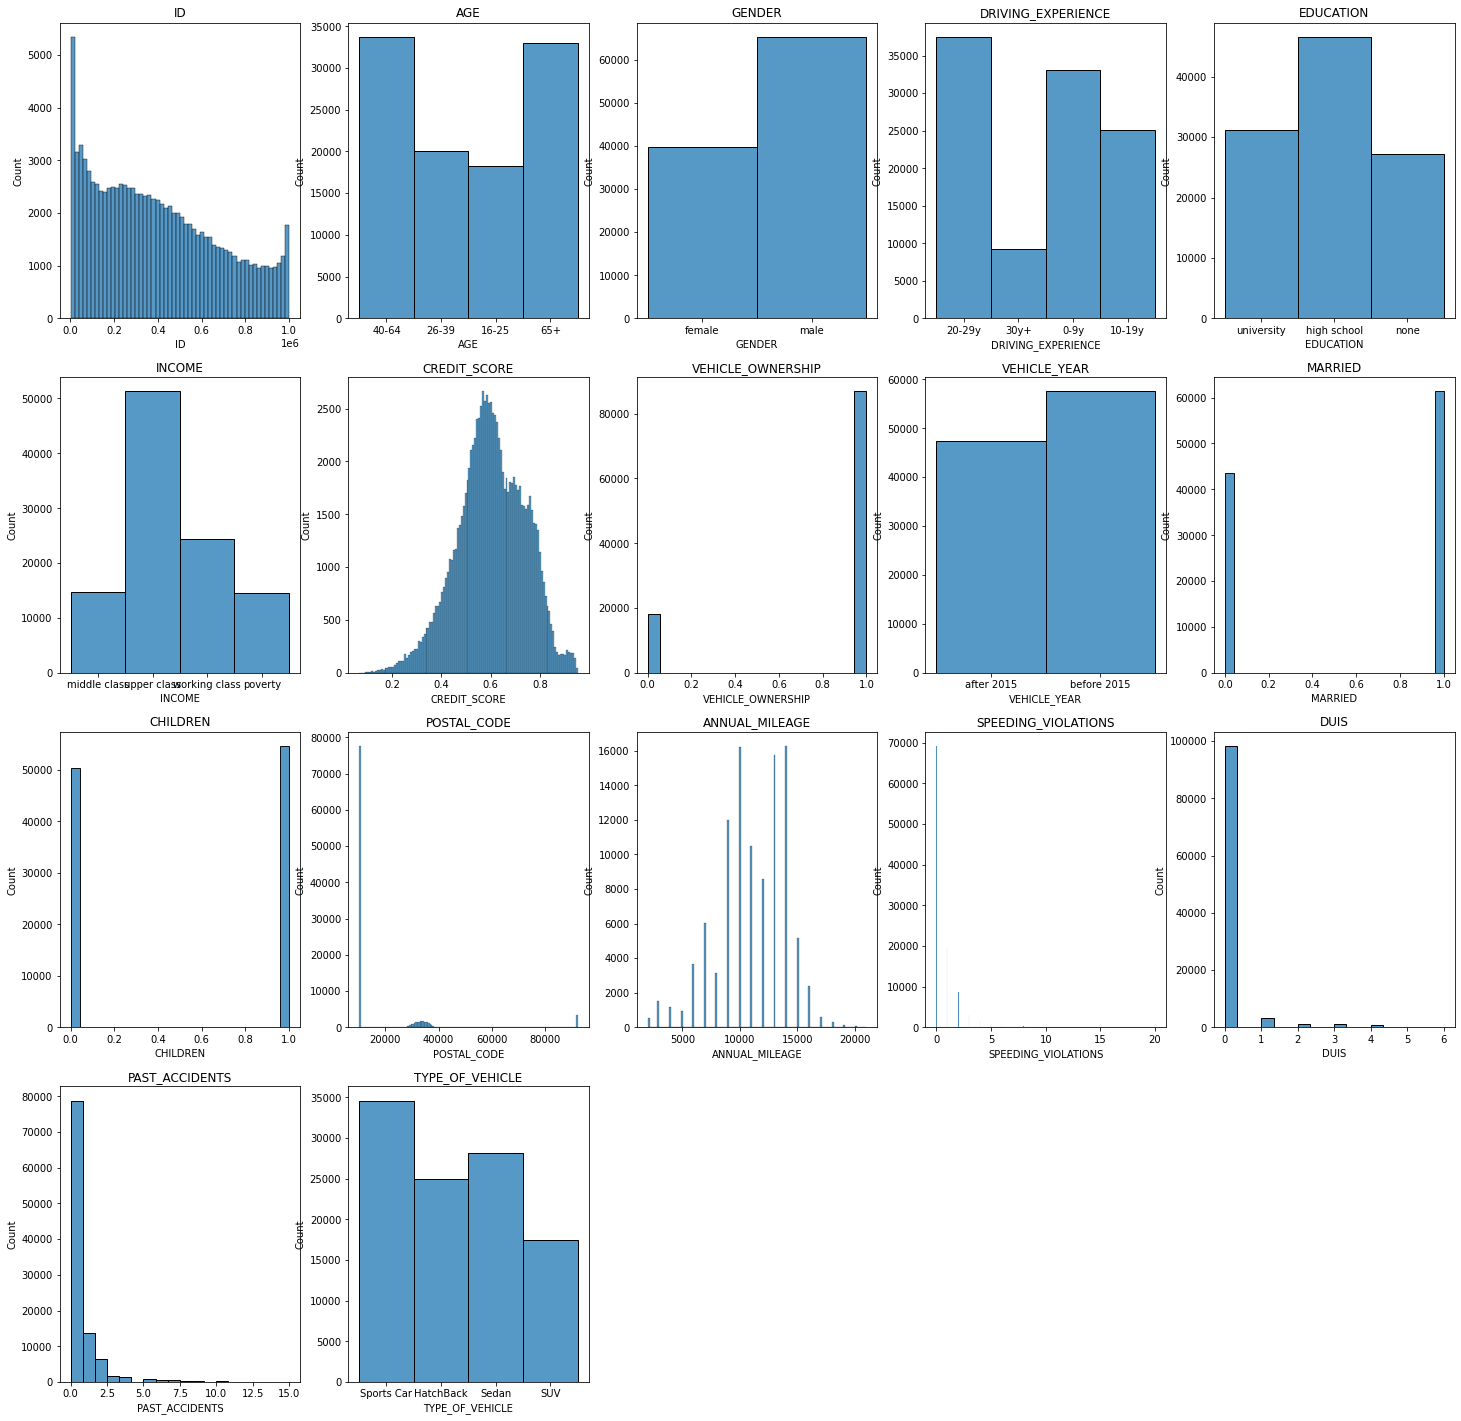

In [223]:
plt.figure(figsize = (25,25))
for i in range(len(inp_features)):
    plt.subplot(4,5,i+1)
    plt.title(inp_features[i])
    sns.histplot(tr[inp_features[i]])

<AxesSubplot:title={'center':'OUTCOME'}, xlabel='OUTCOME', ylabel='Count'>

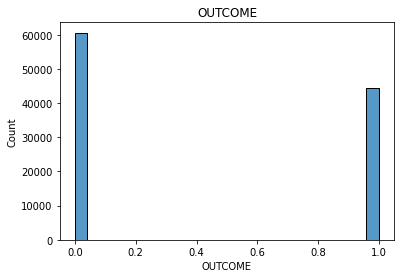

In [224]:
plt.title('OUTCOME')
sns.histplot(tr['OUTCOME'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

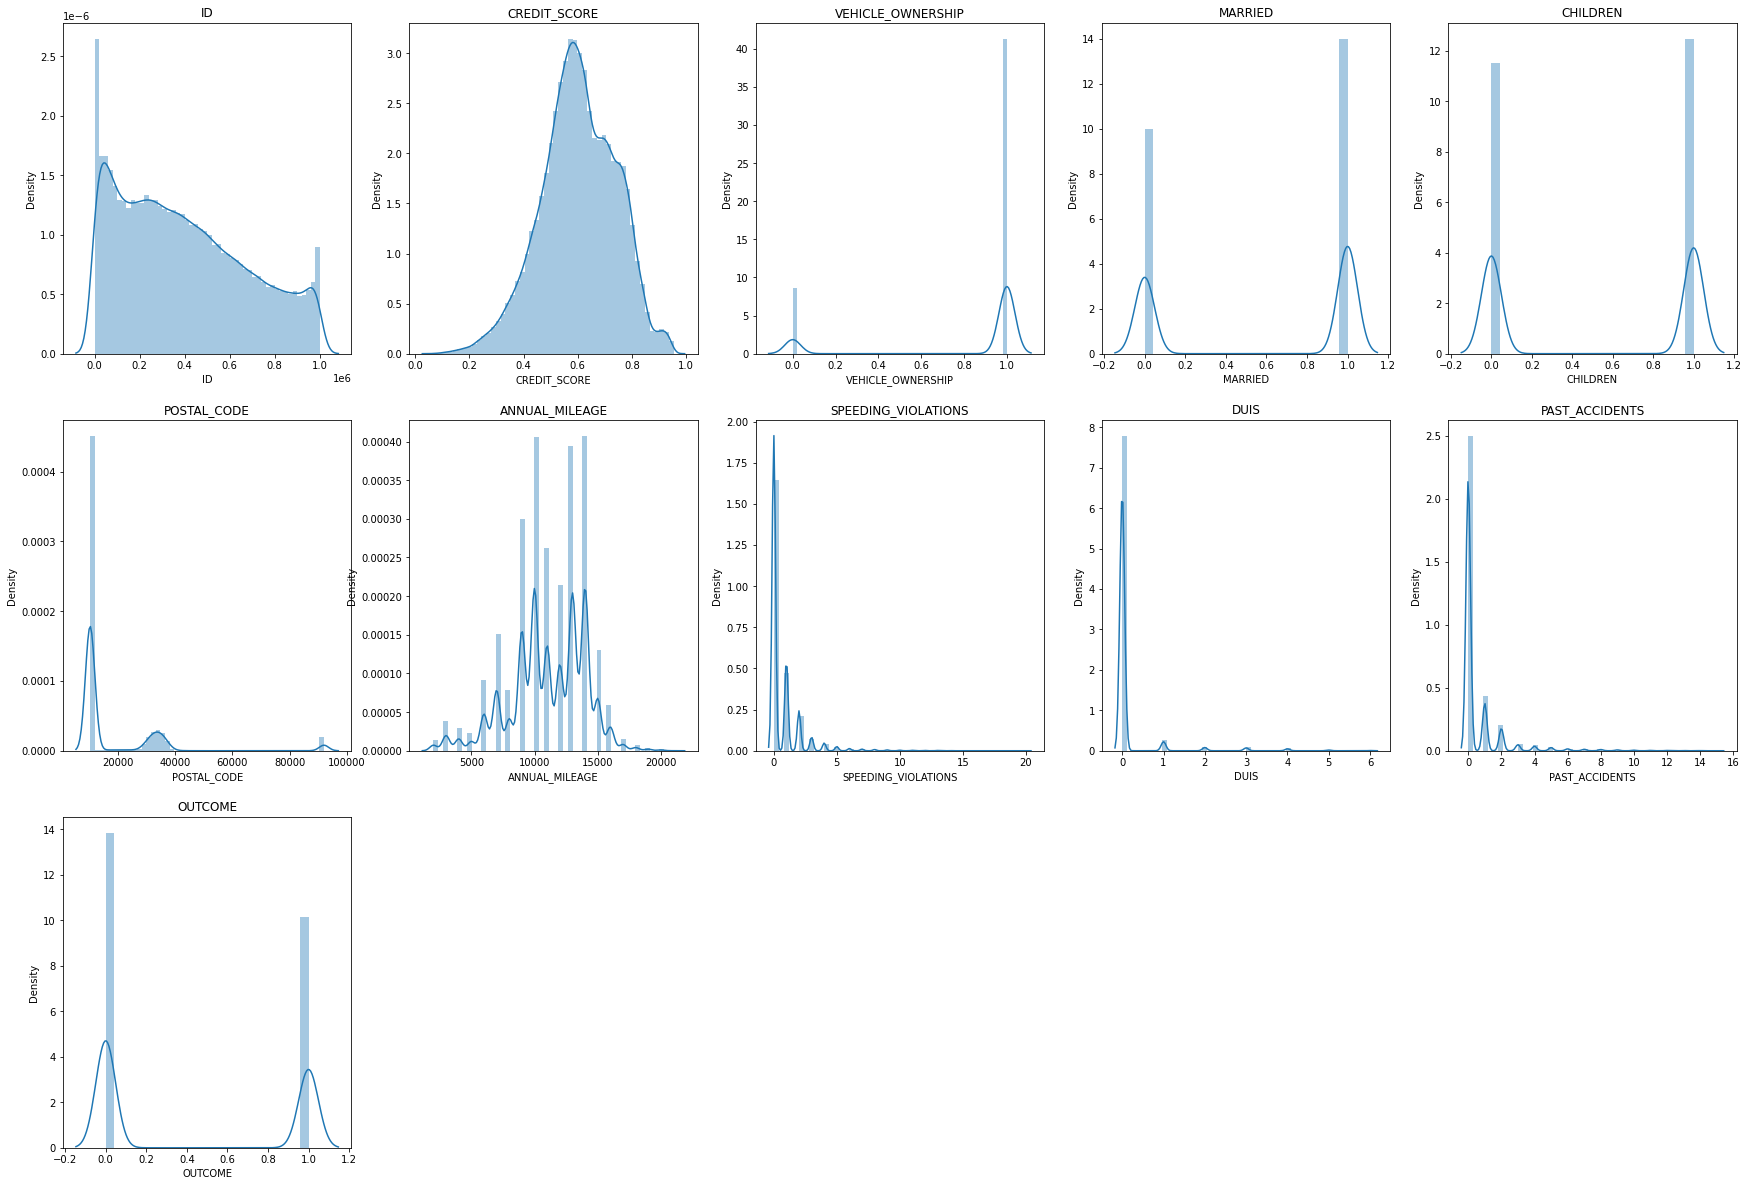

In [225]:
plt.figure(figsize = (30,28))

for i in range(len(num_feat)):
    plt.subplot(4,5,i+1)
    plt.title(num_feat[i])
    sns.distplot(tr[num_feat[i]], axlabel=num_feat[i])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'OUTCOME'}, xlabel='OUTCOME', ylabel='Density'>

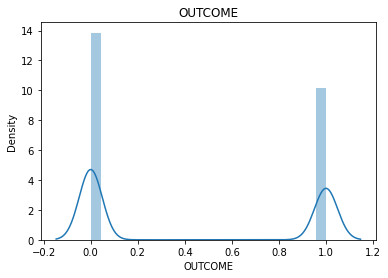

In [226]:
plt.title('OUTCOME')
sns.distplot(tr['OUTCOME'])

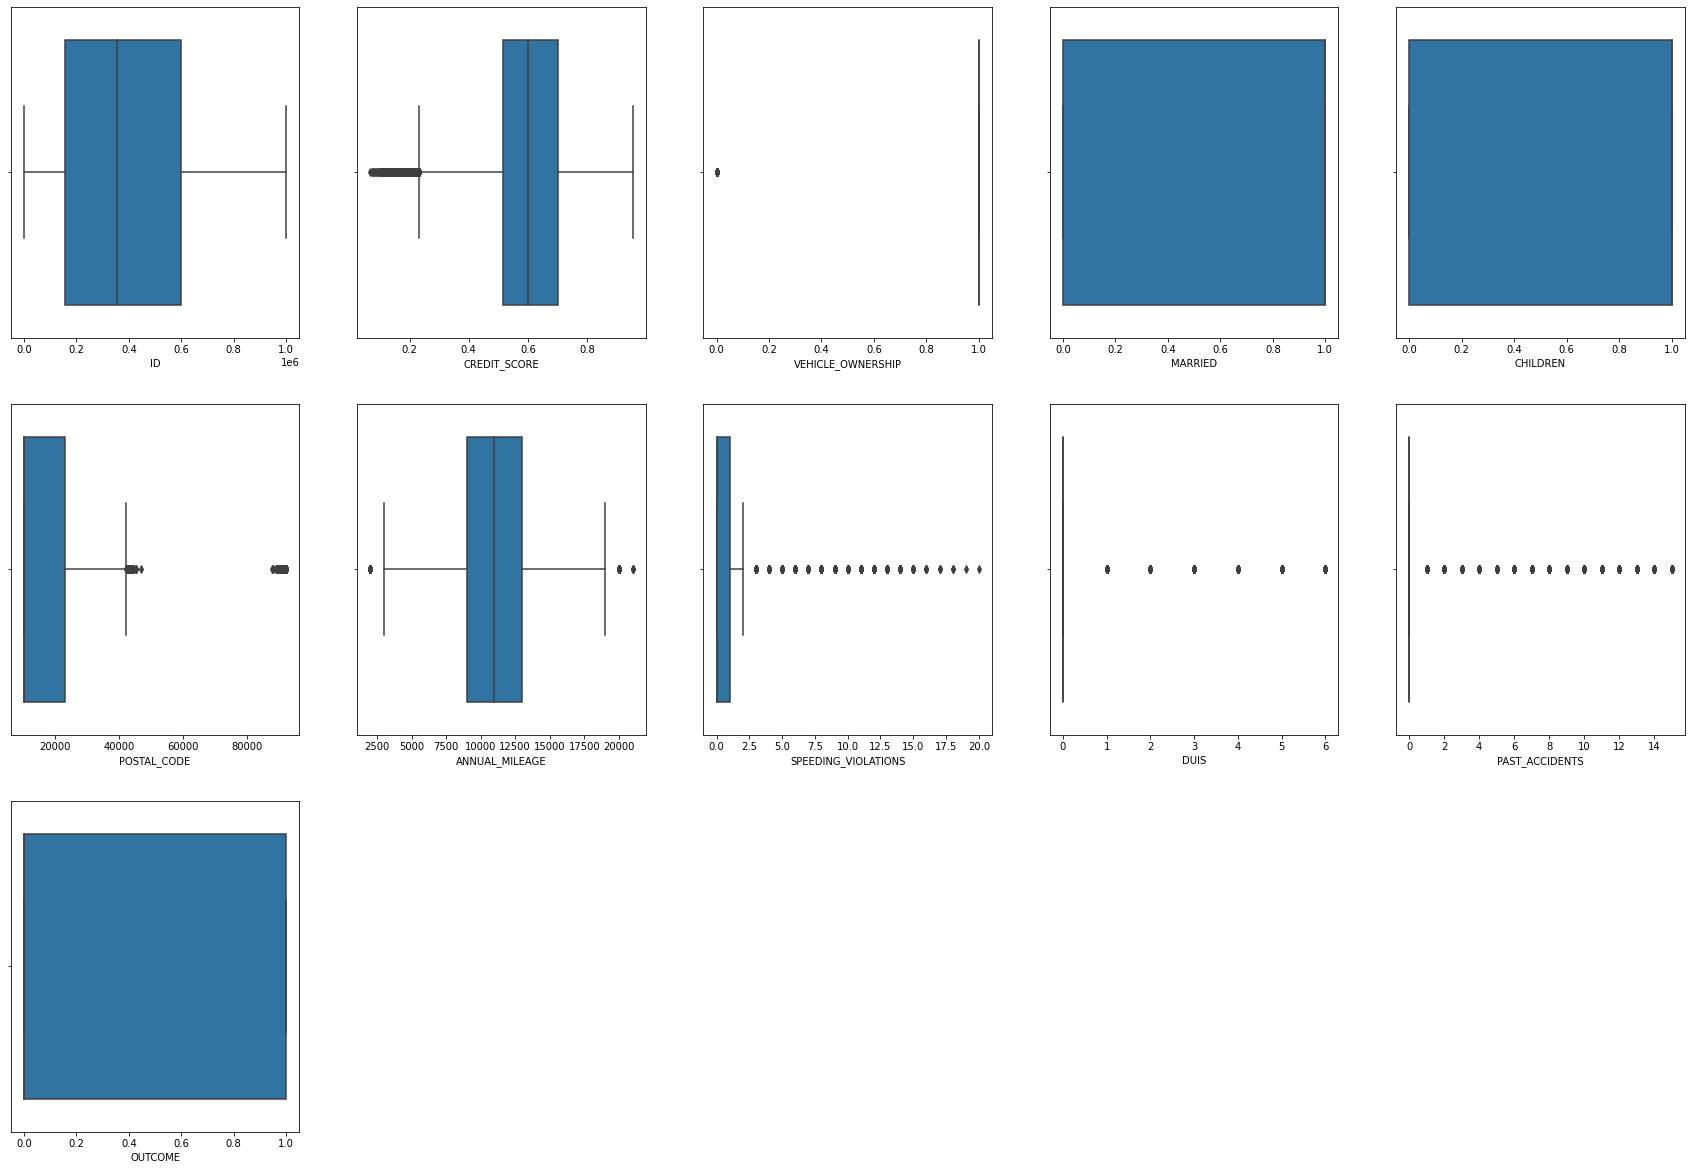

In [227]:
plt.figure(figsize = (30,28))

for i in range(len(num_feat)):
    plt.subplot(4,5,i+1)
    sns.boxplot(x = tr[num_feat[i]])

# Bivariate Plots

# Box Plot

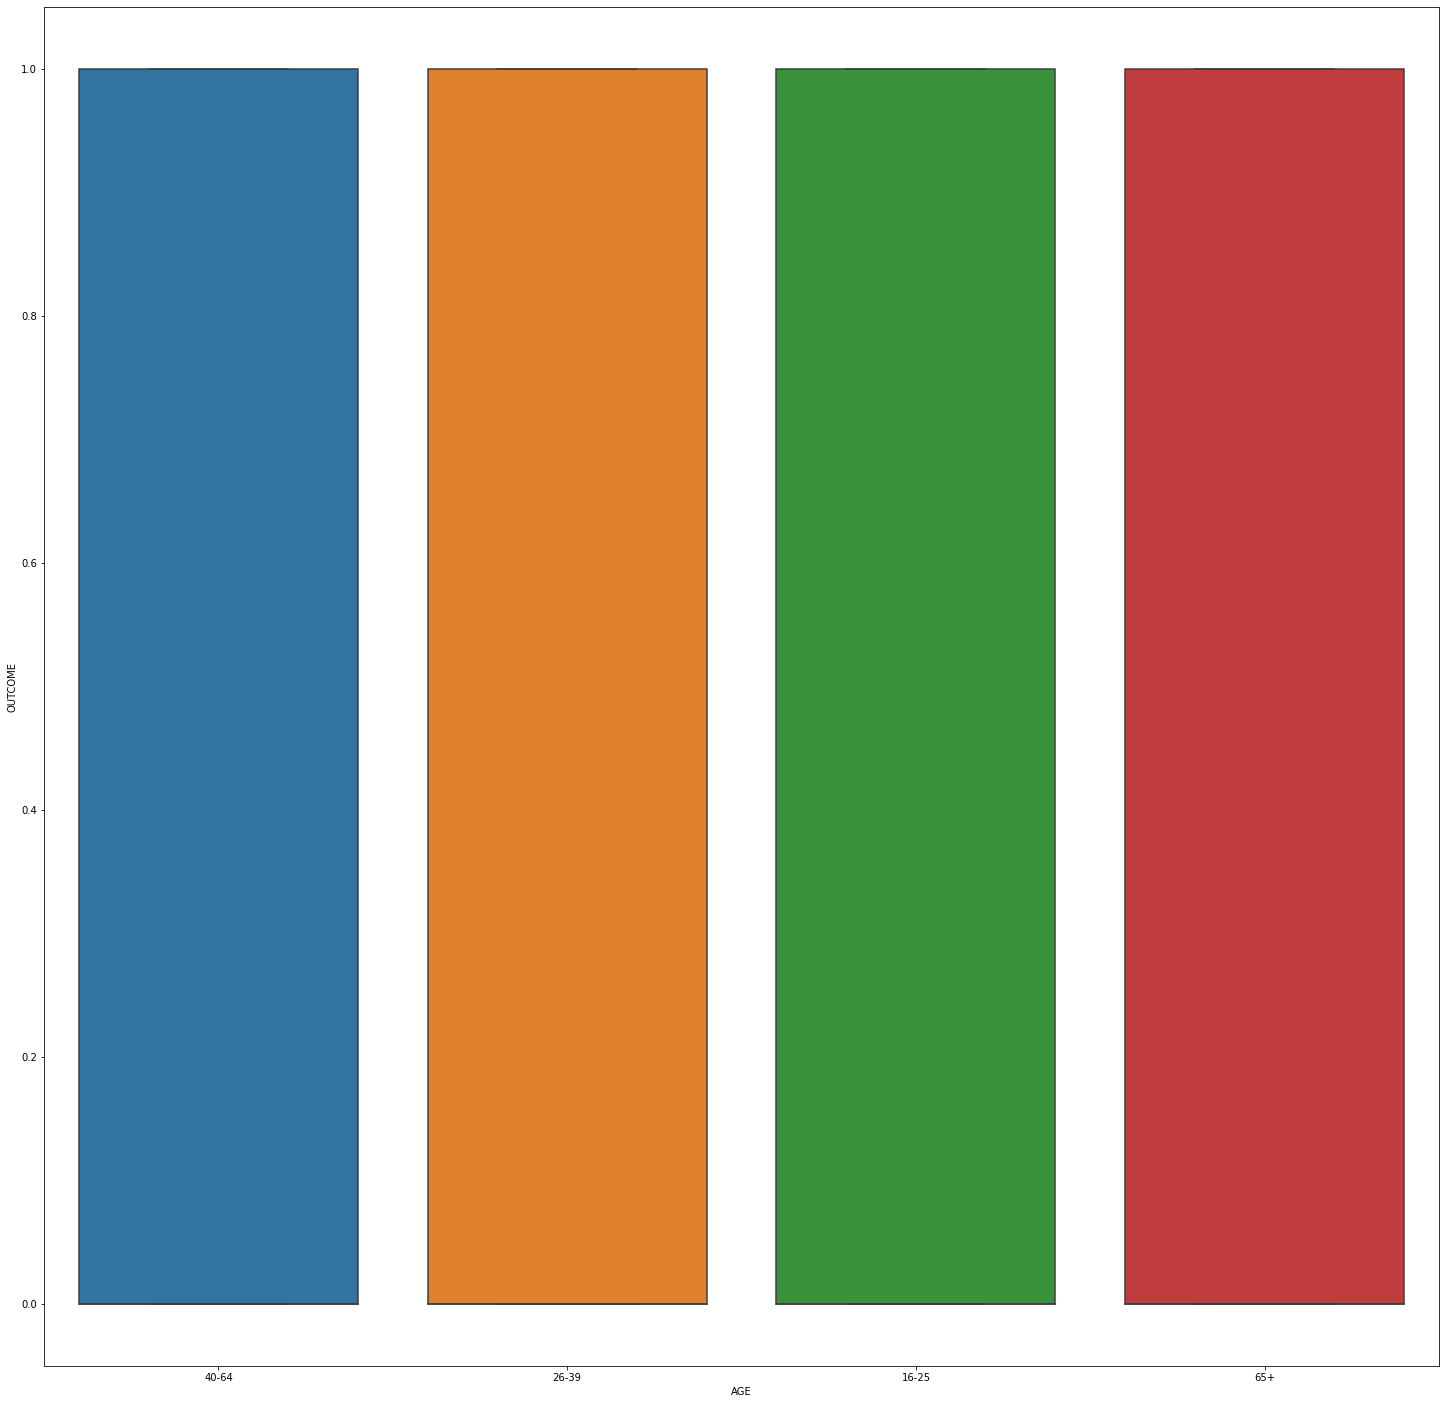

In [228]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[1], y = 'OUTCOME');

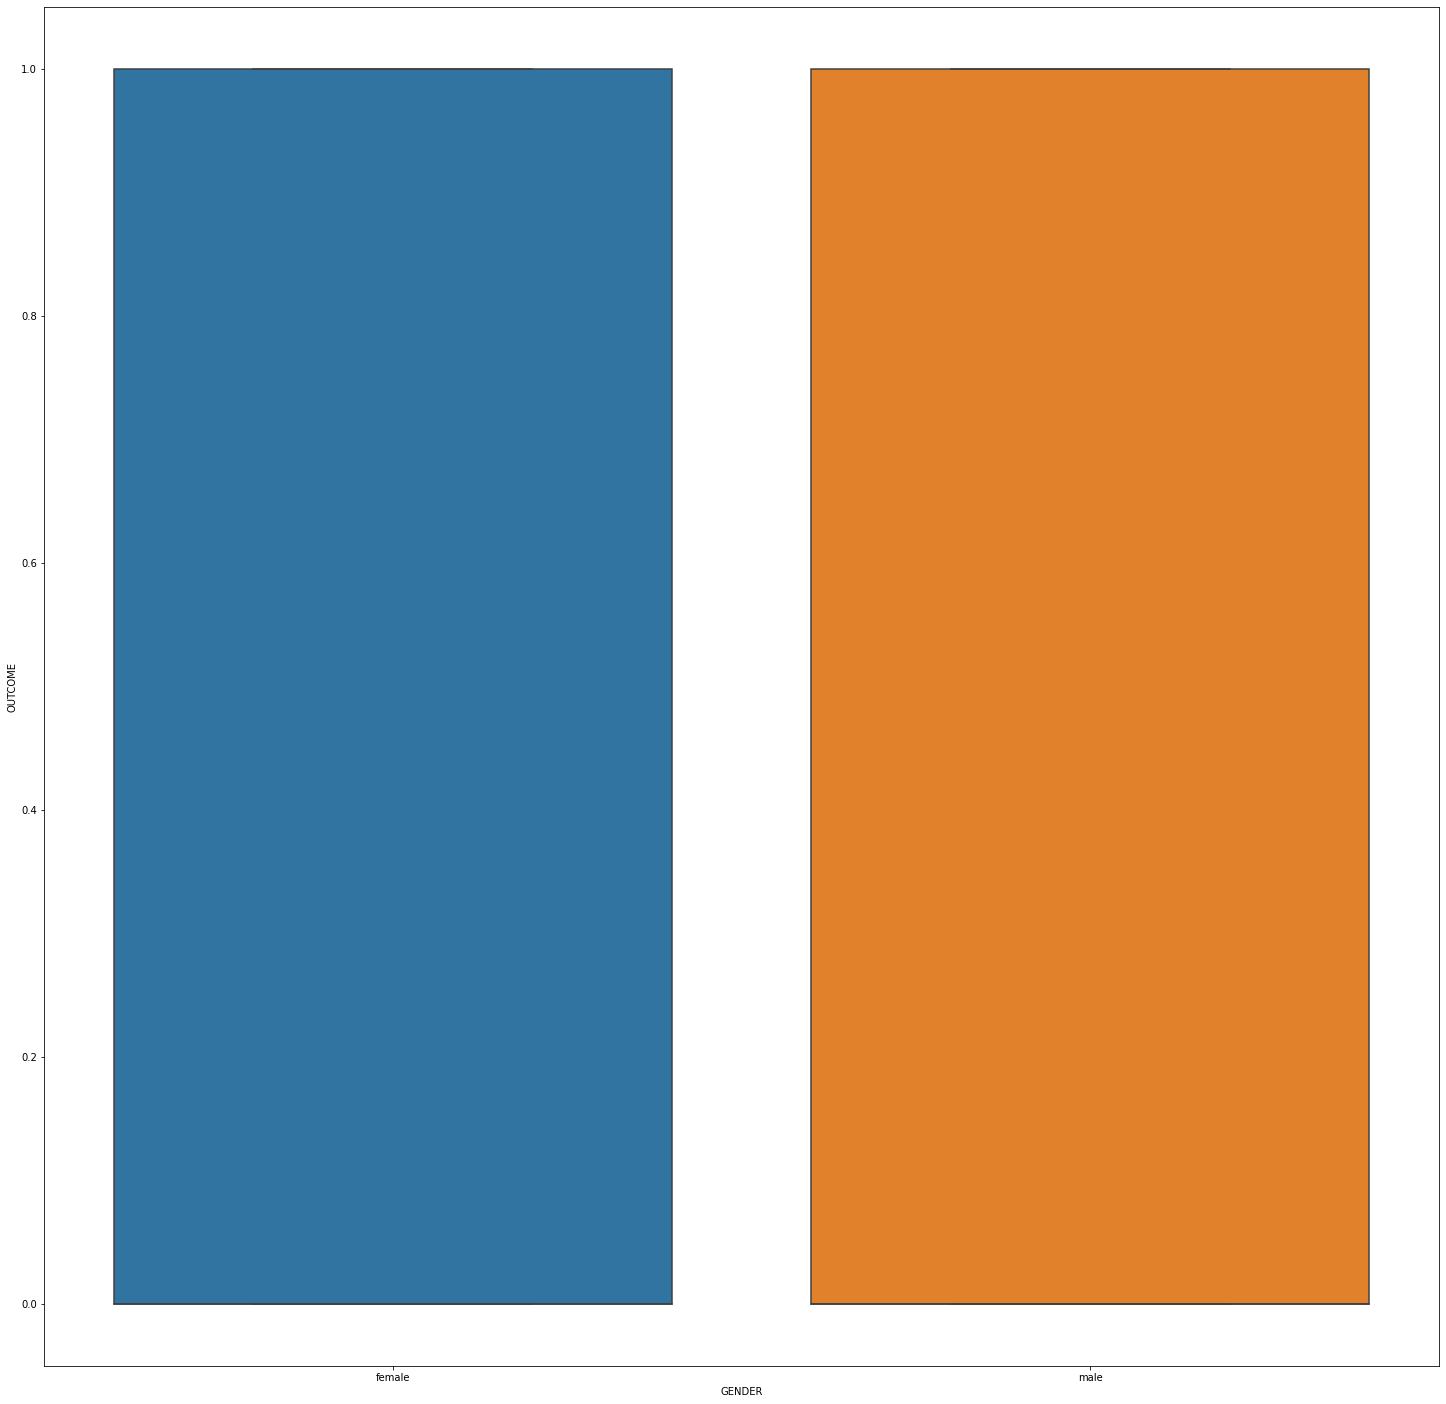

In [229]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[2], y = 'OUTCOME');

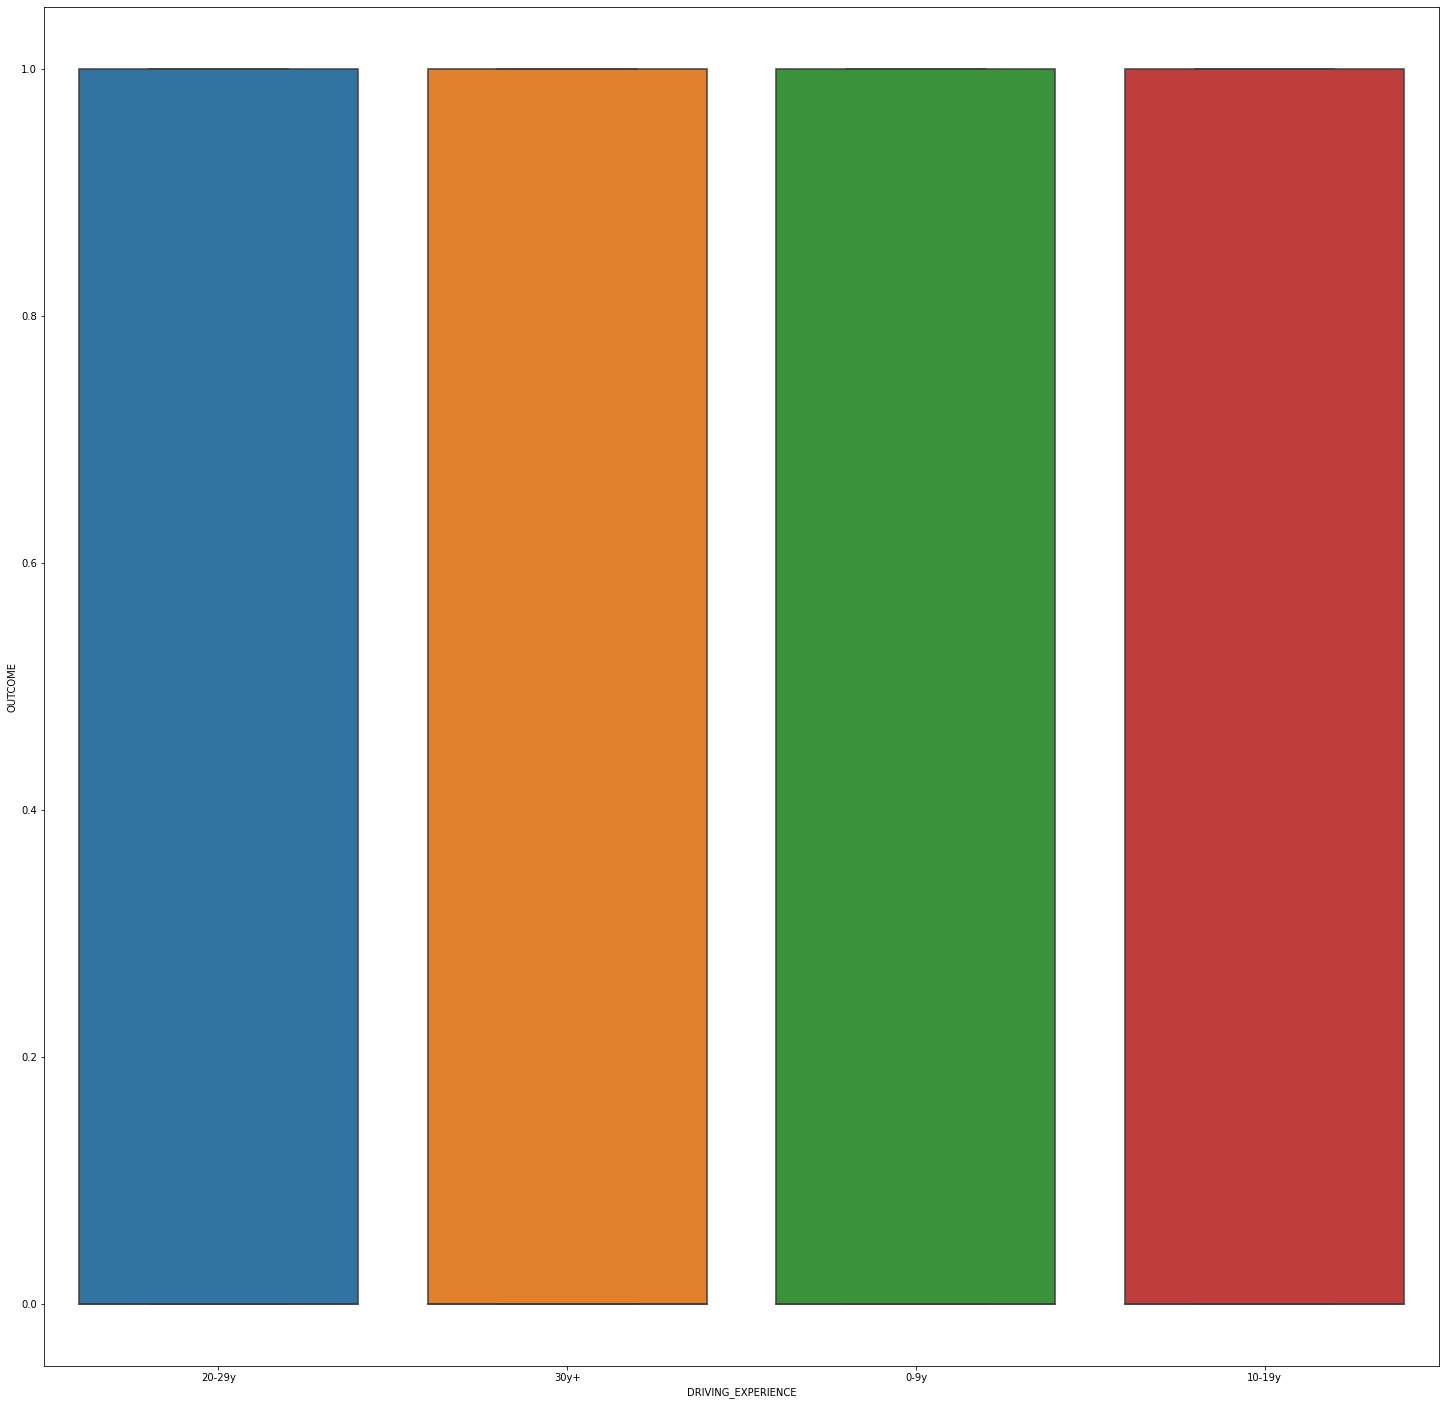

In [230]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[3], y = 'OUTCOME');

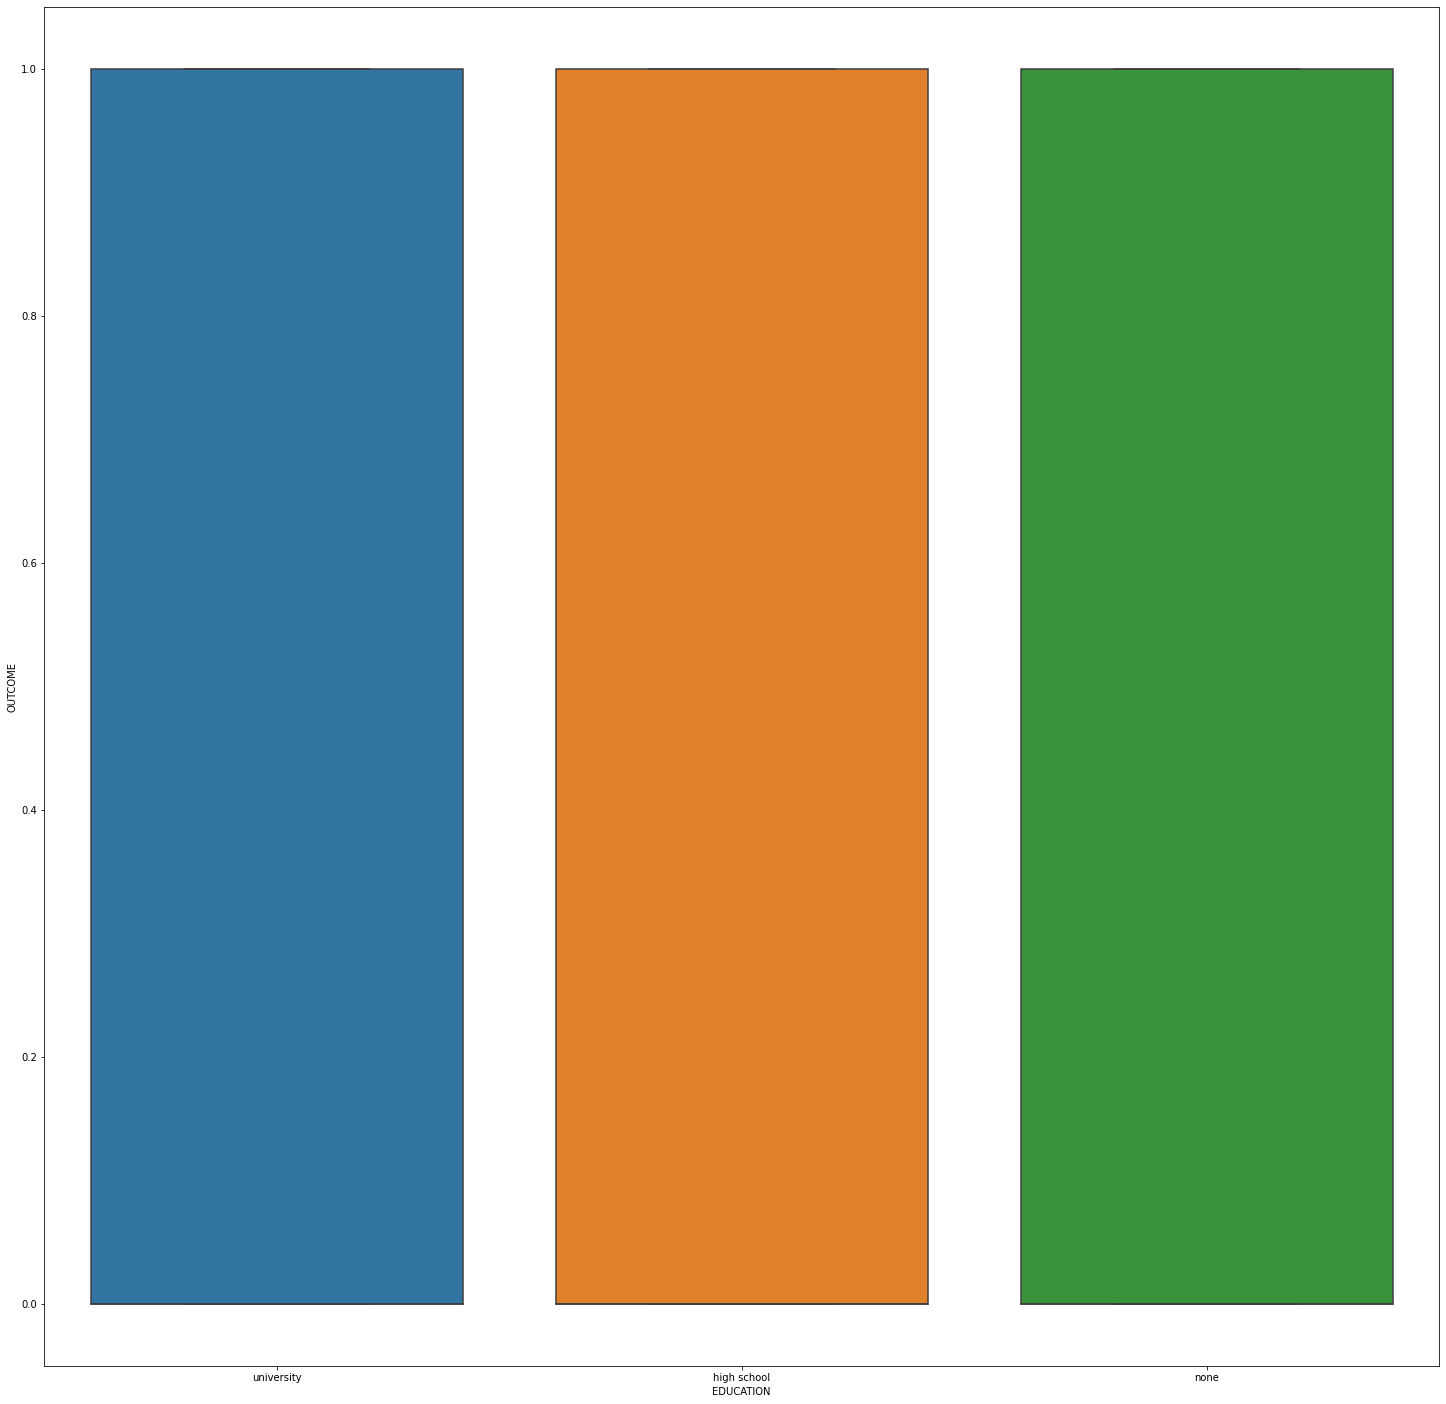

In [231]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[4], y = 'OUTCOME');

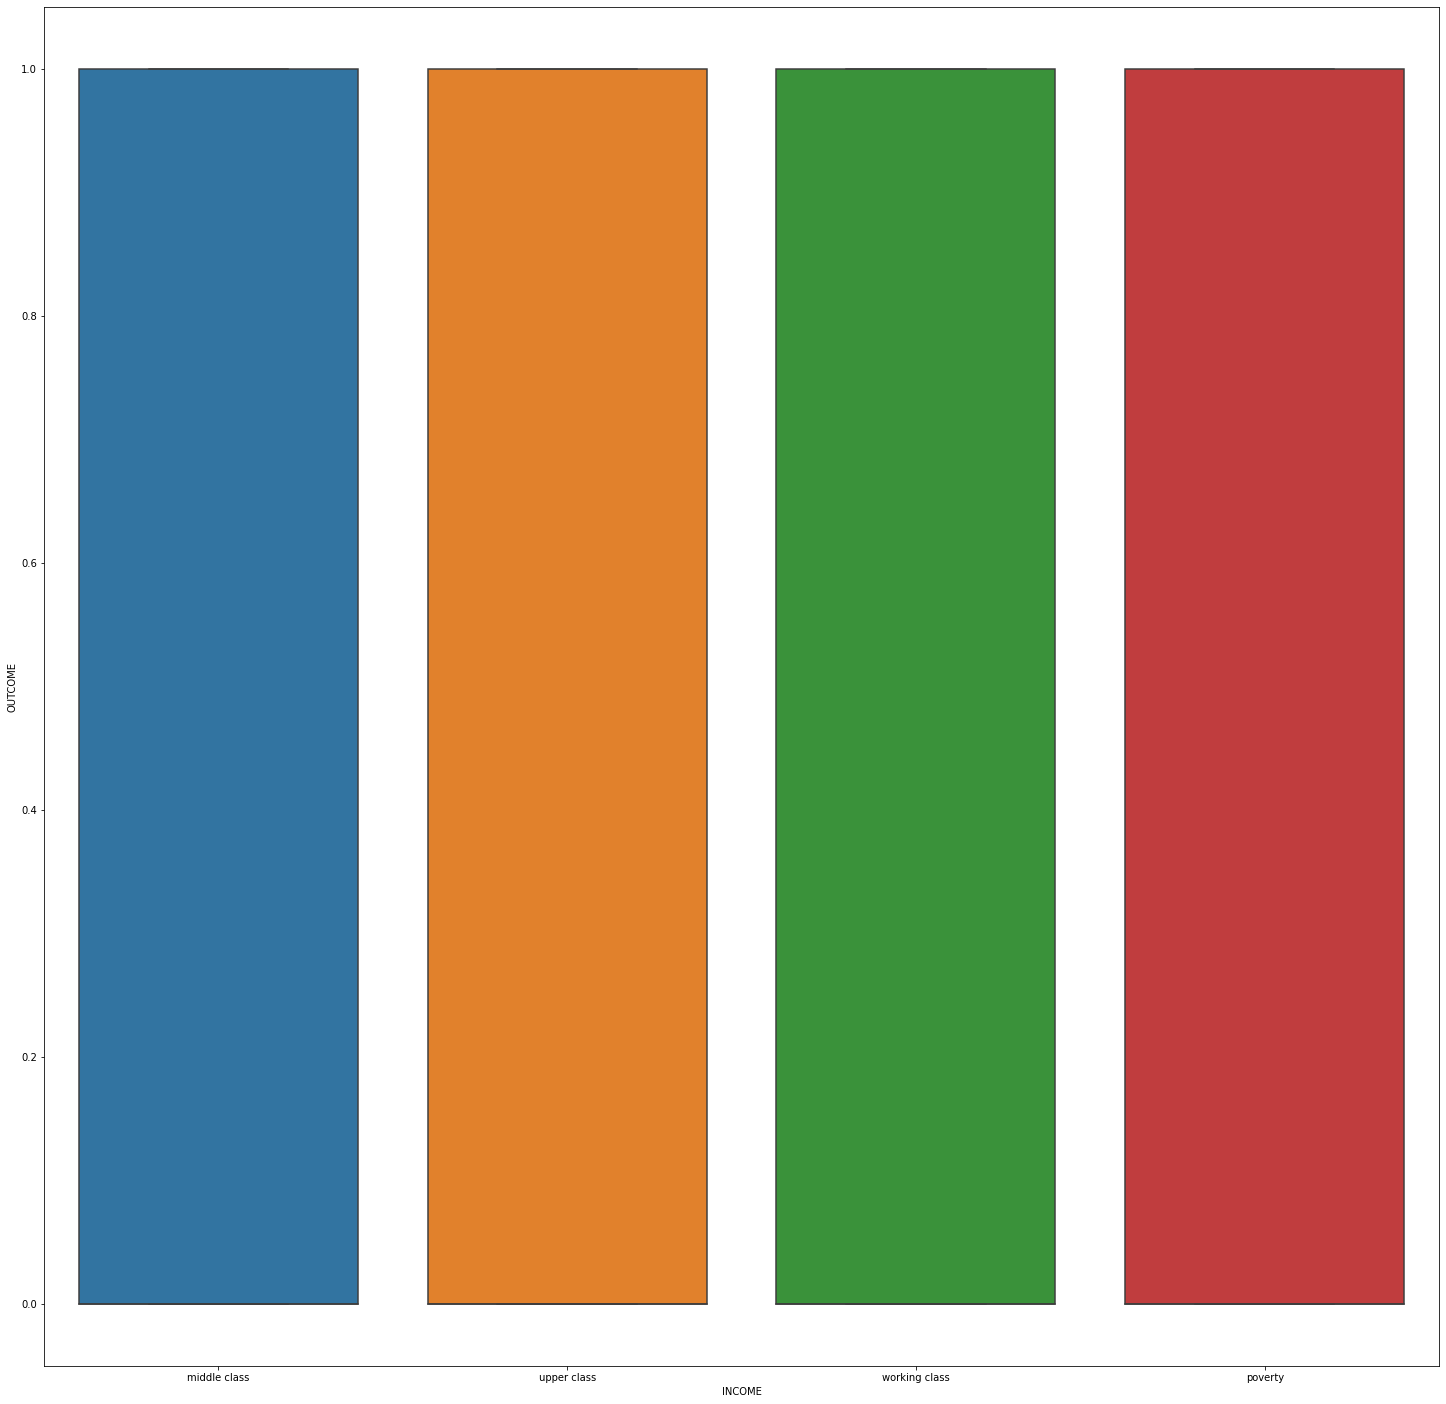

In [232]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[5], y = 'OUTCOME');

In [233]:
# fig = plt.figure(figsize=(25, 25))
# ax=sns.boxplot(data = tr, x = inp_features[6], y = 'OUTCOME');

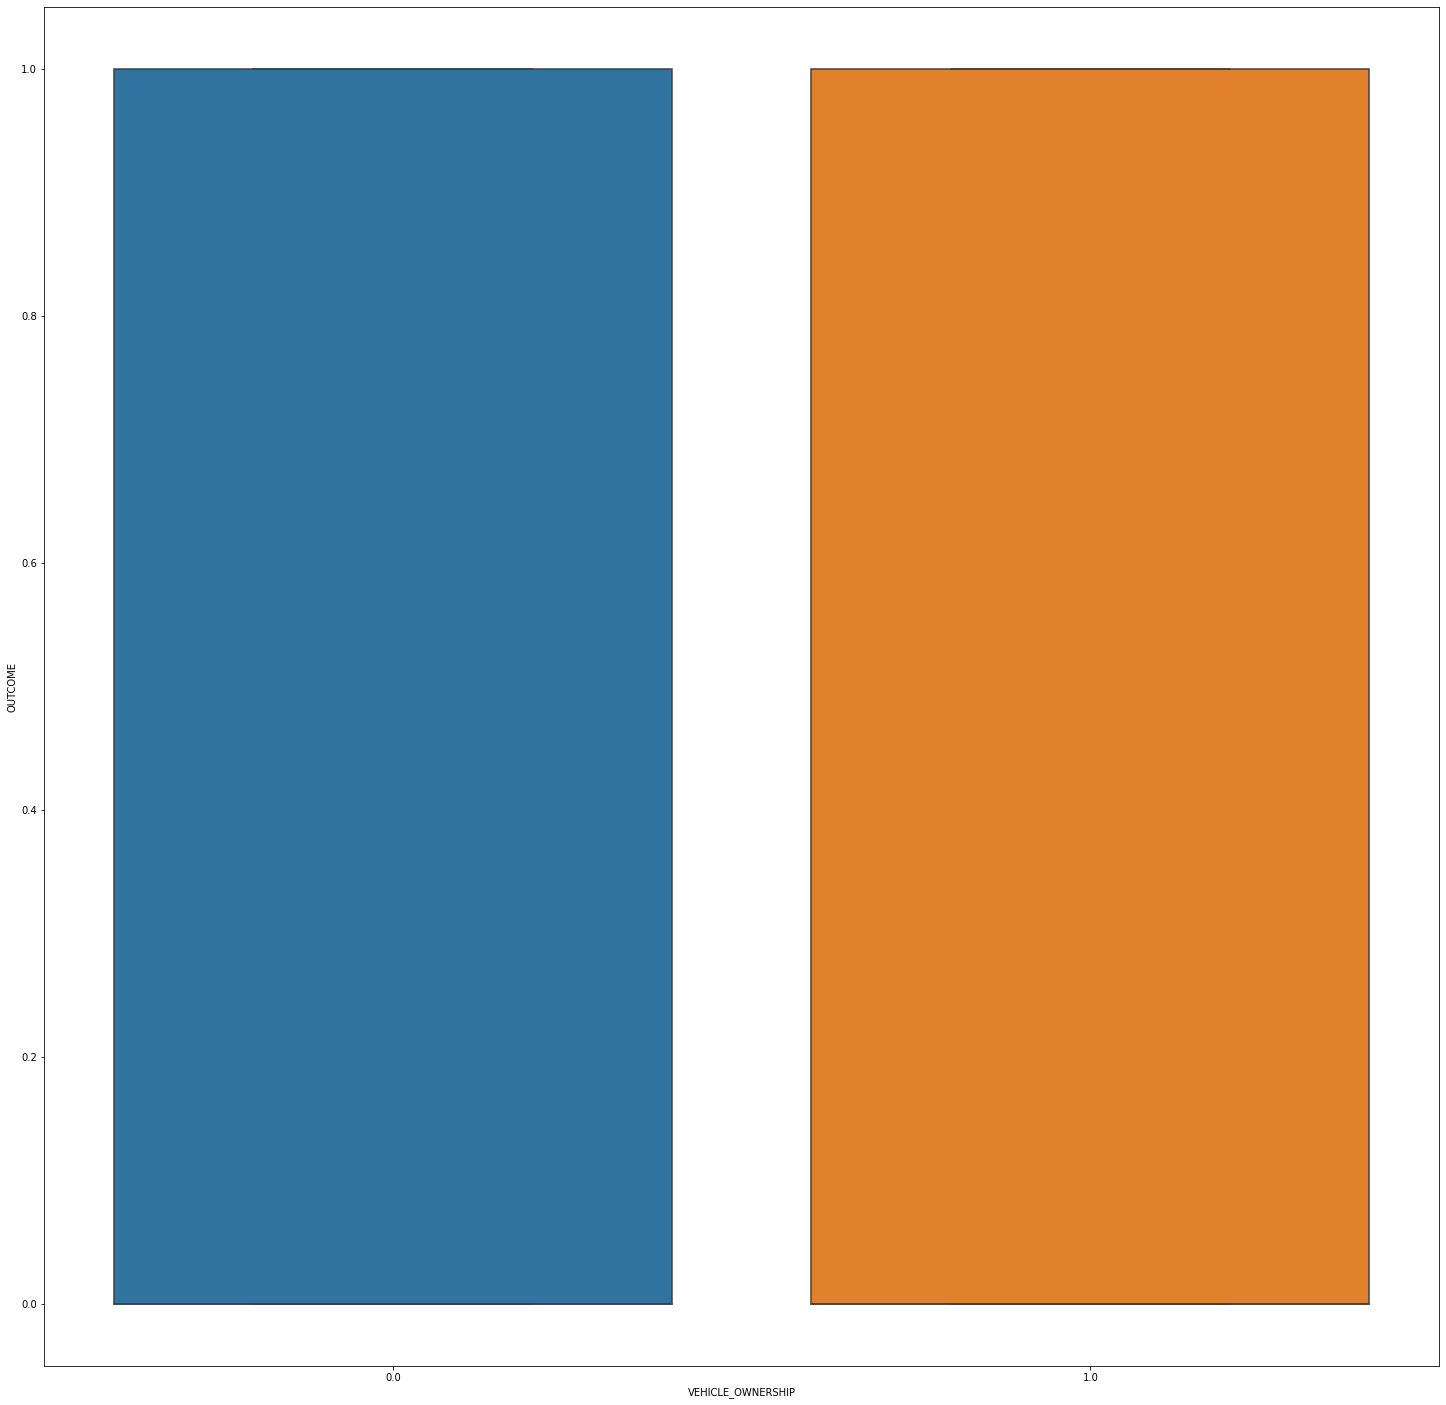

In [234]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[7], y = 'OUTCOME');

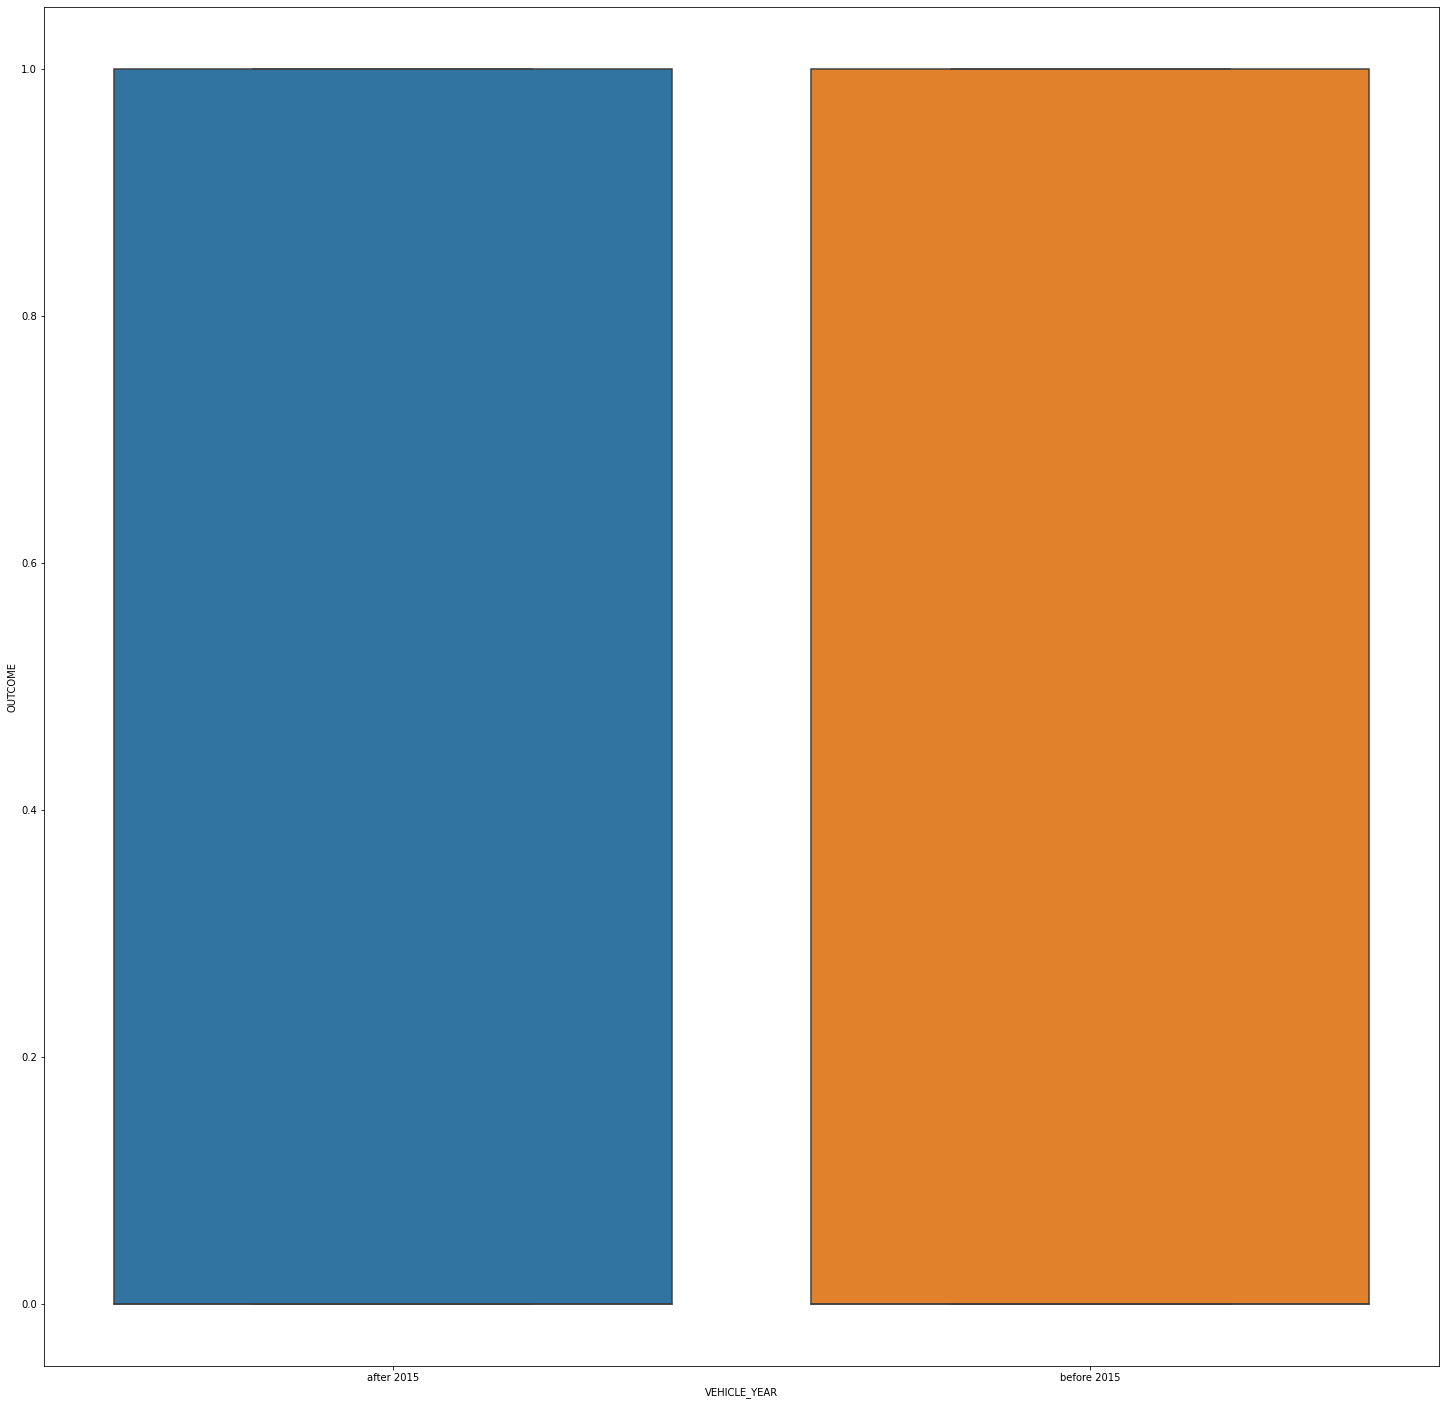

In [235]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[8], y = 'OUTCOME');
# ax.set_yscale('log')

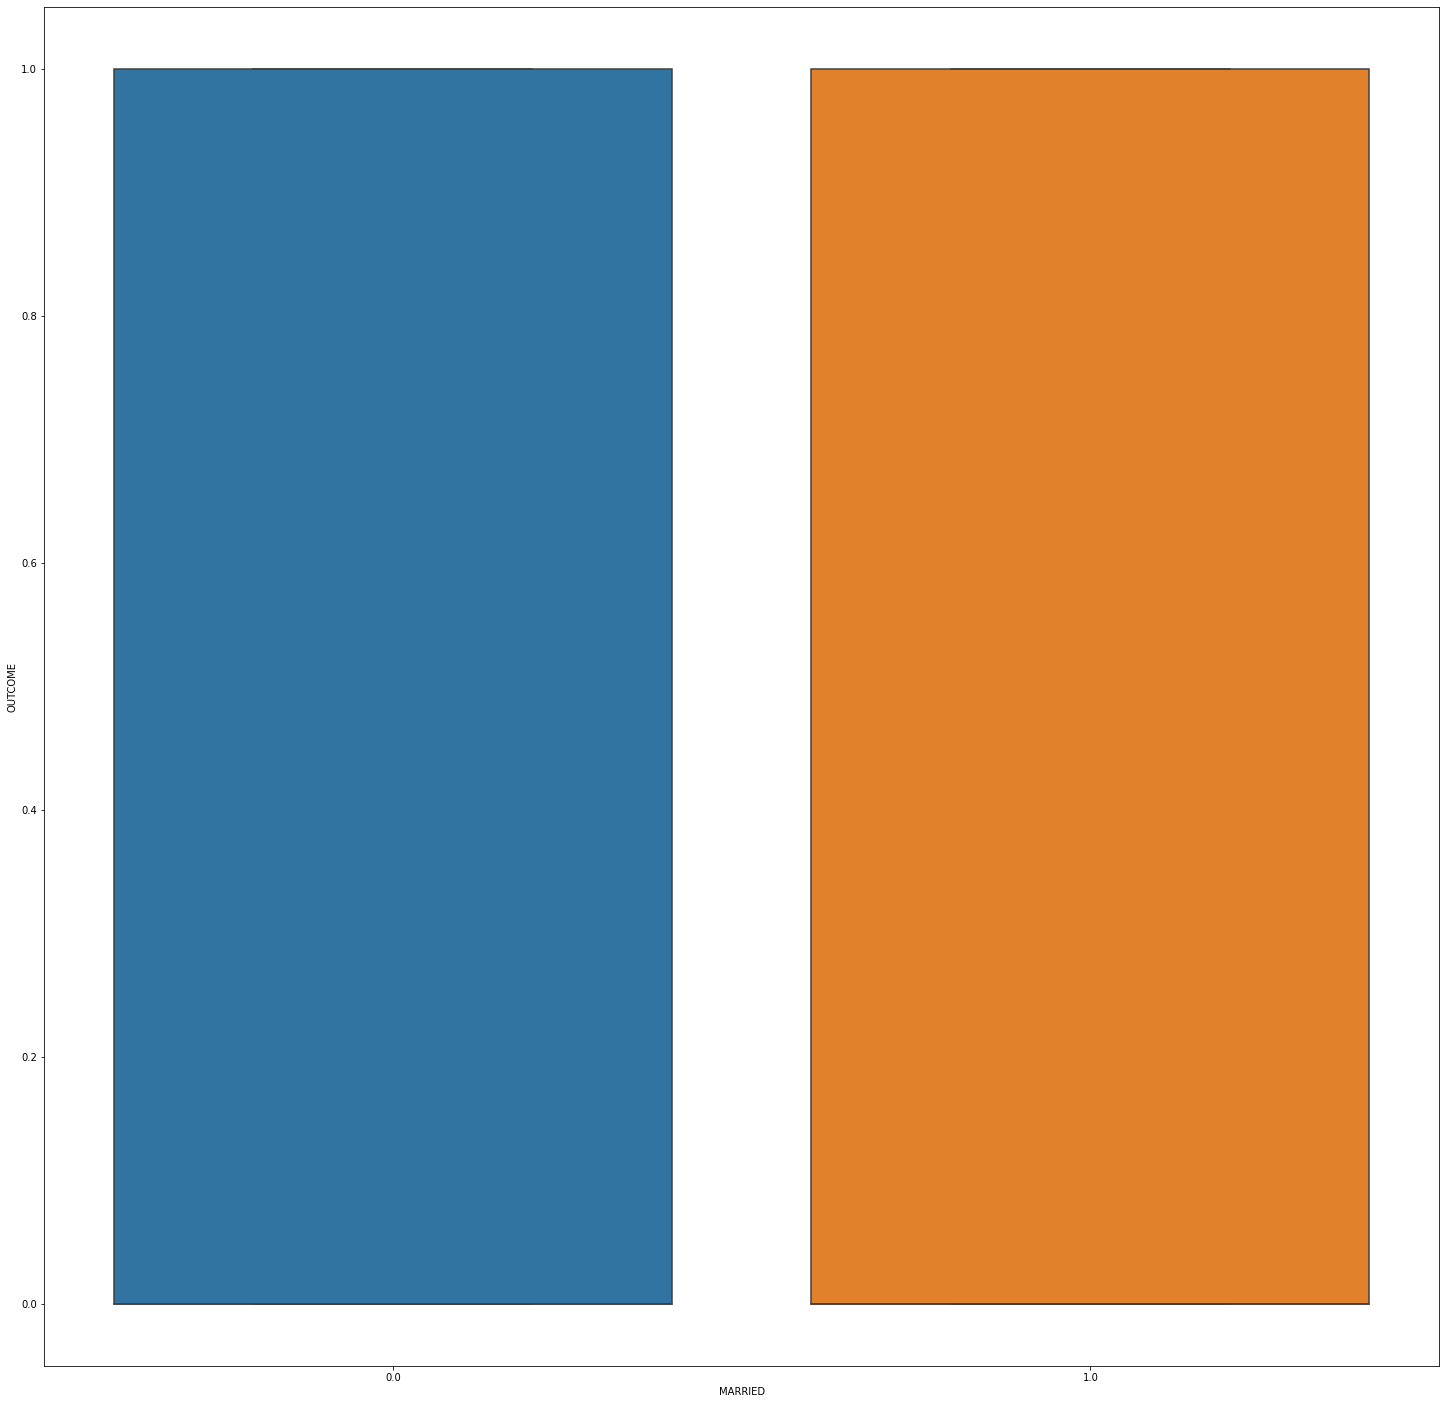

In [236]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[9], y = 'OUTCOME');

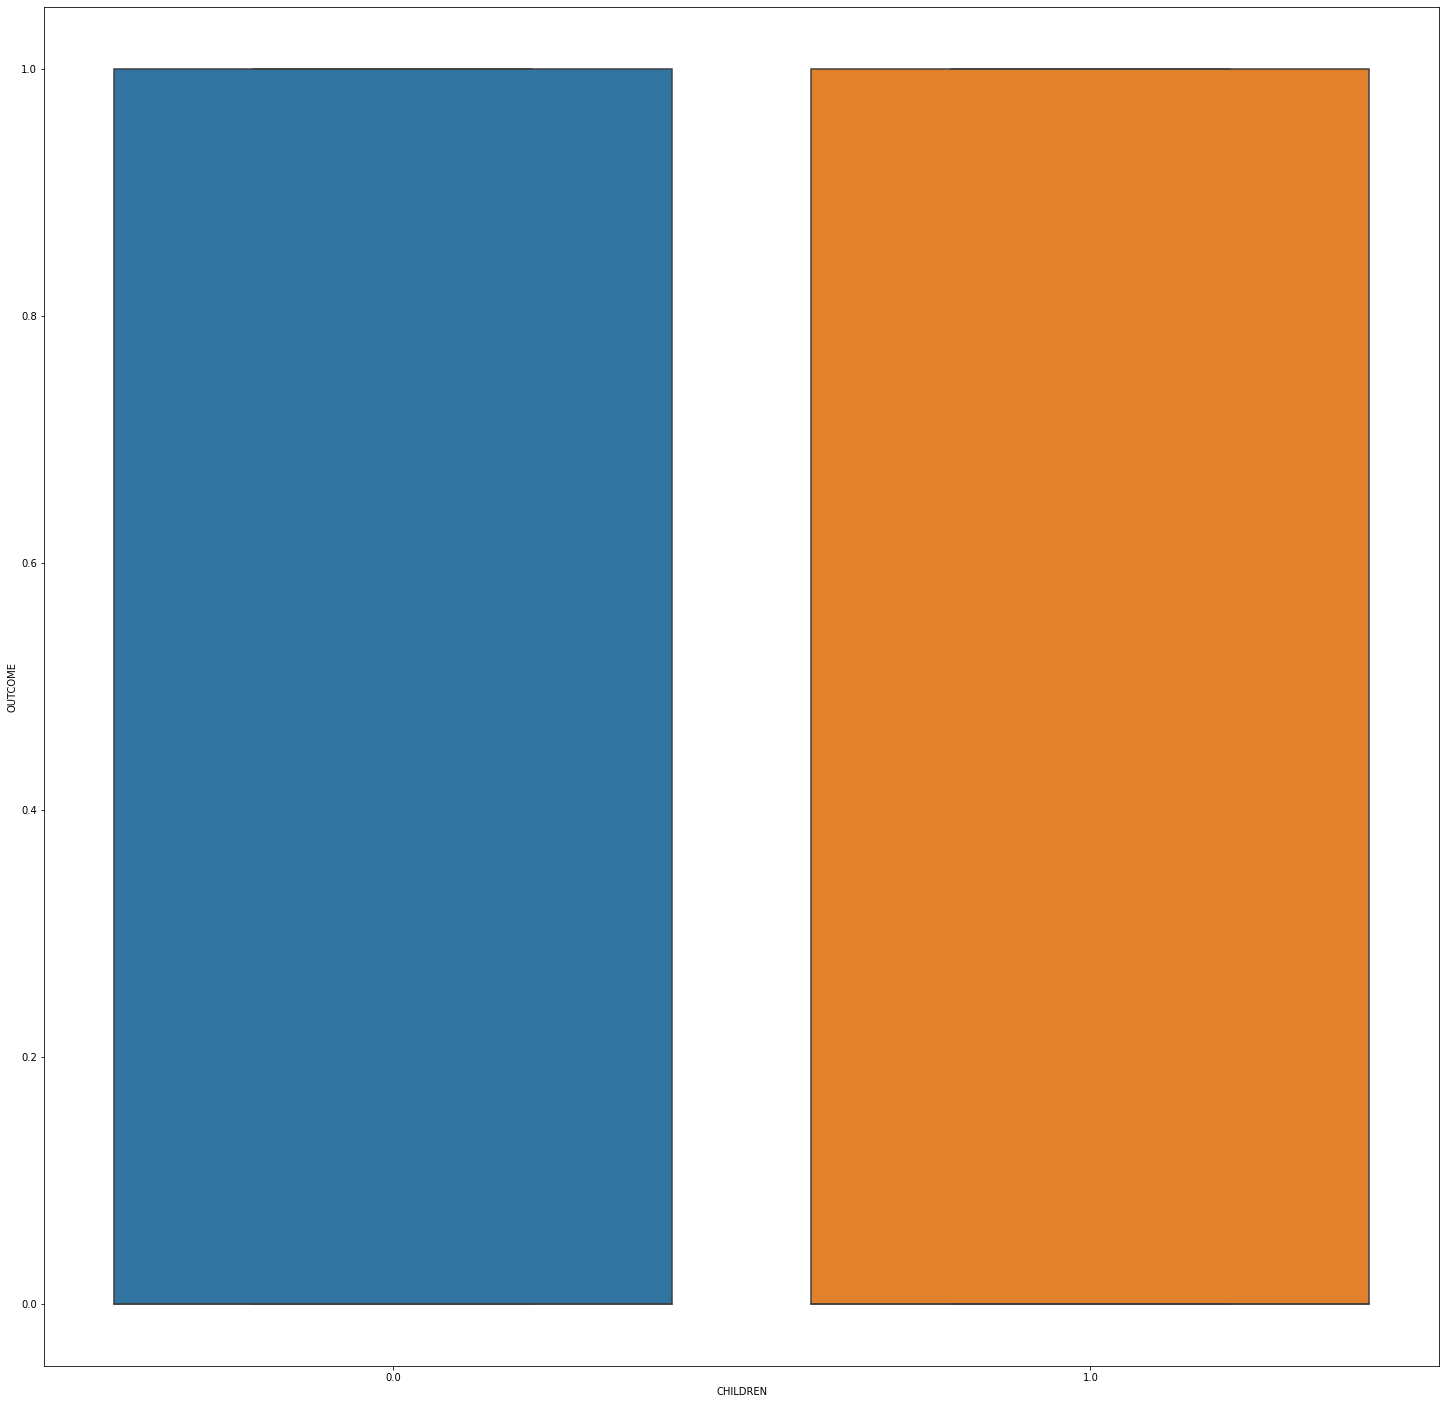

In [237]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[10], y = 'OUTCOME');

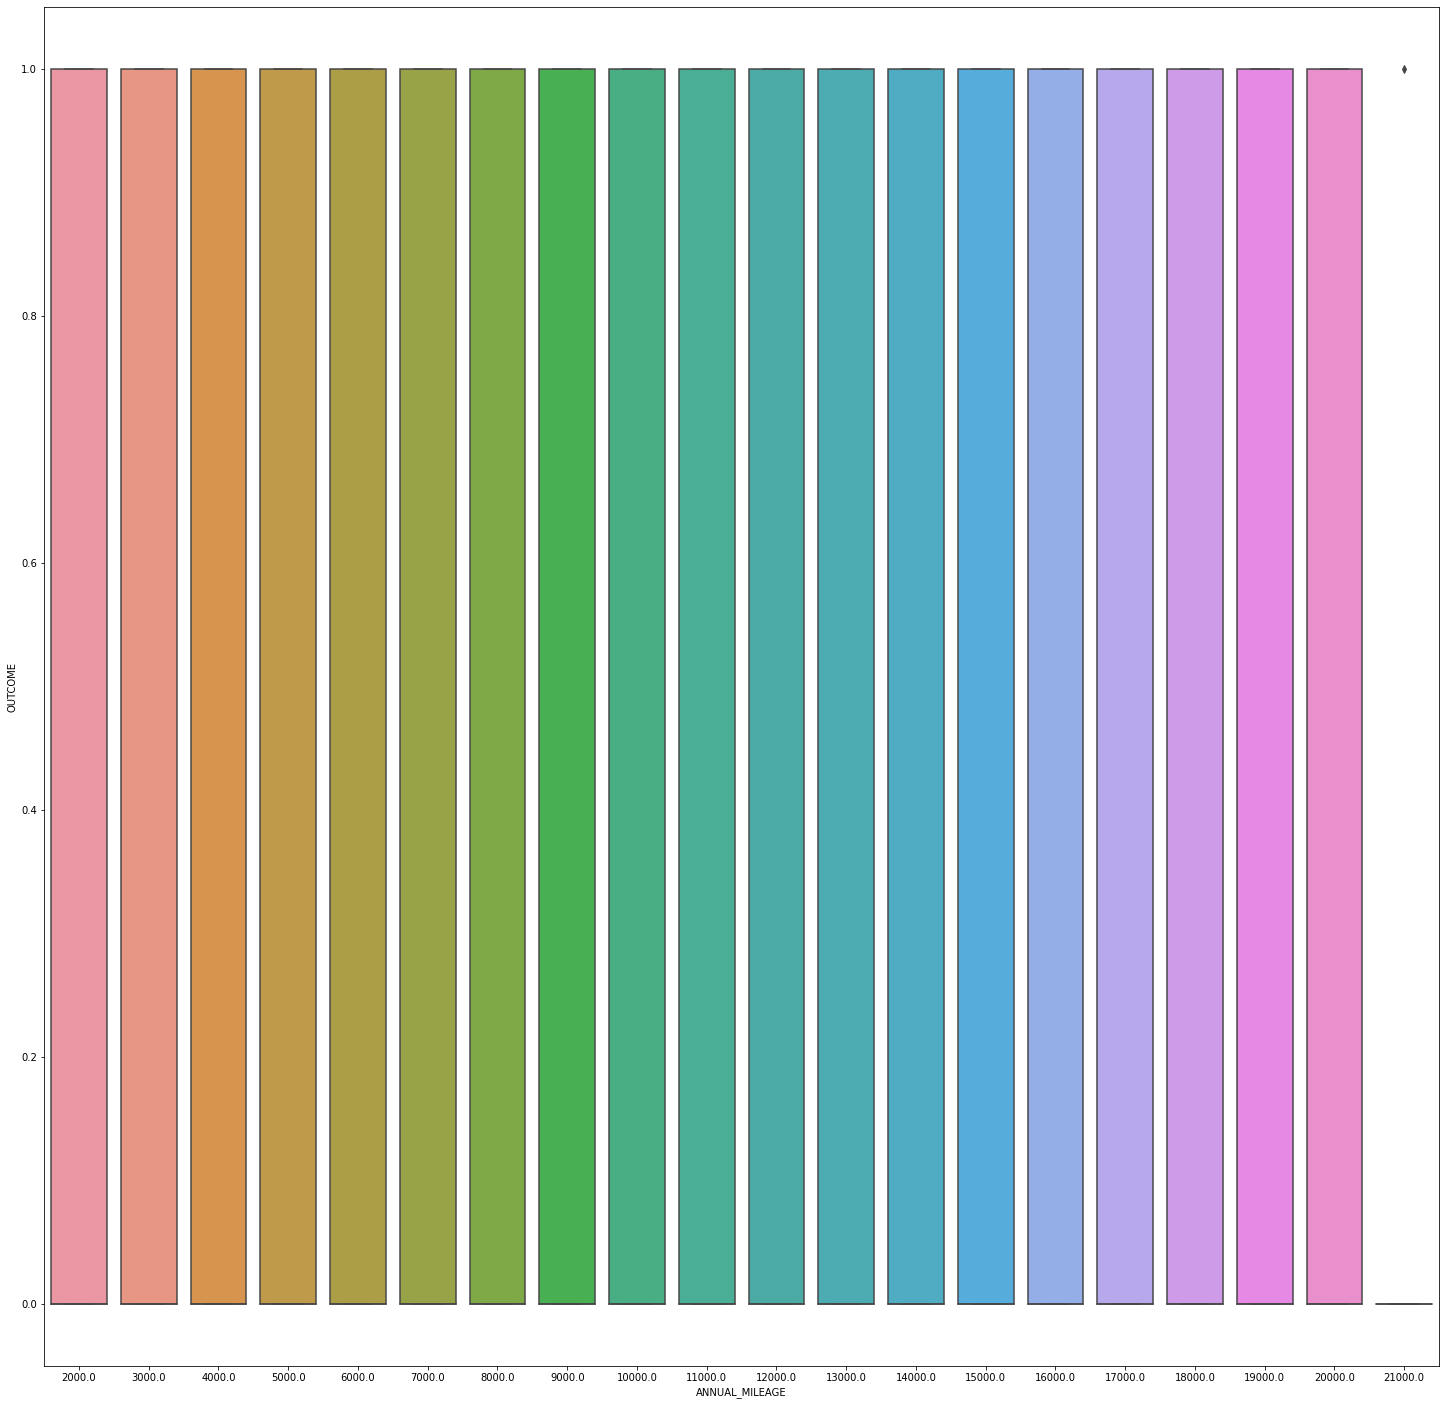

In [238]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[12], y = 'OUTCOME');

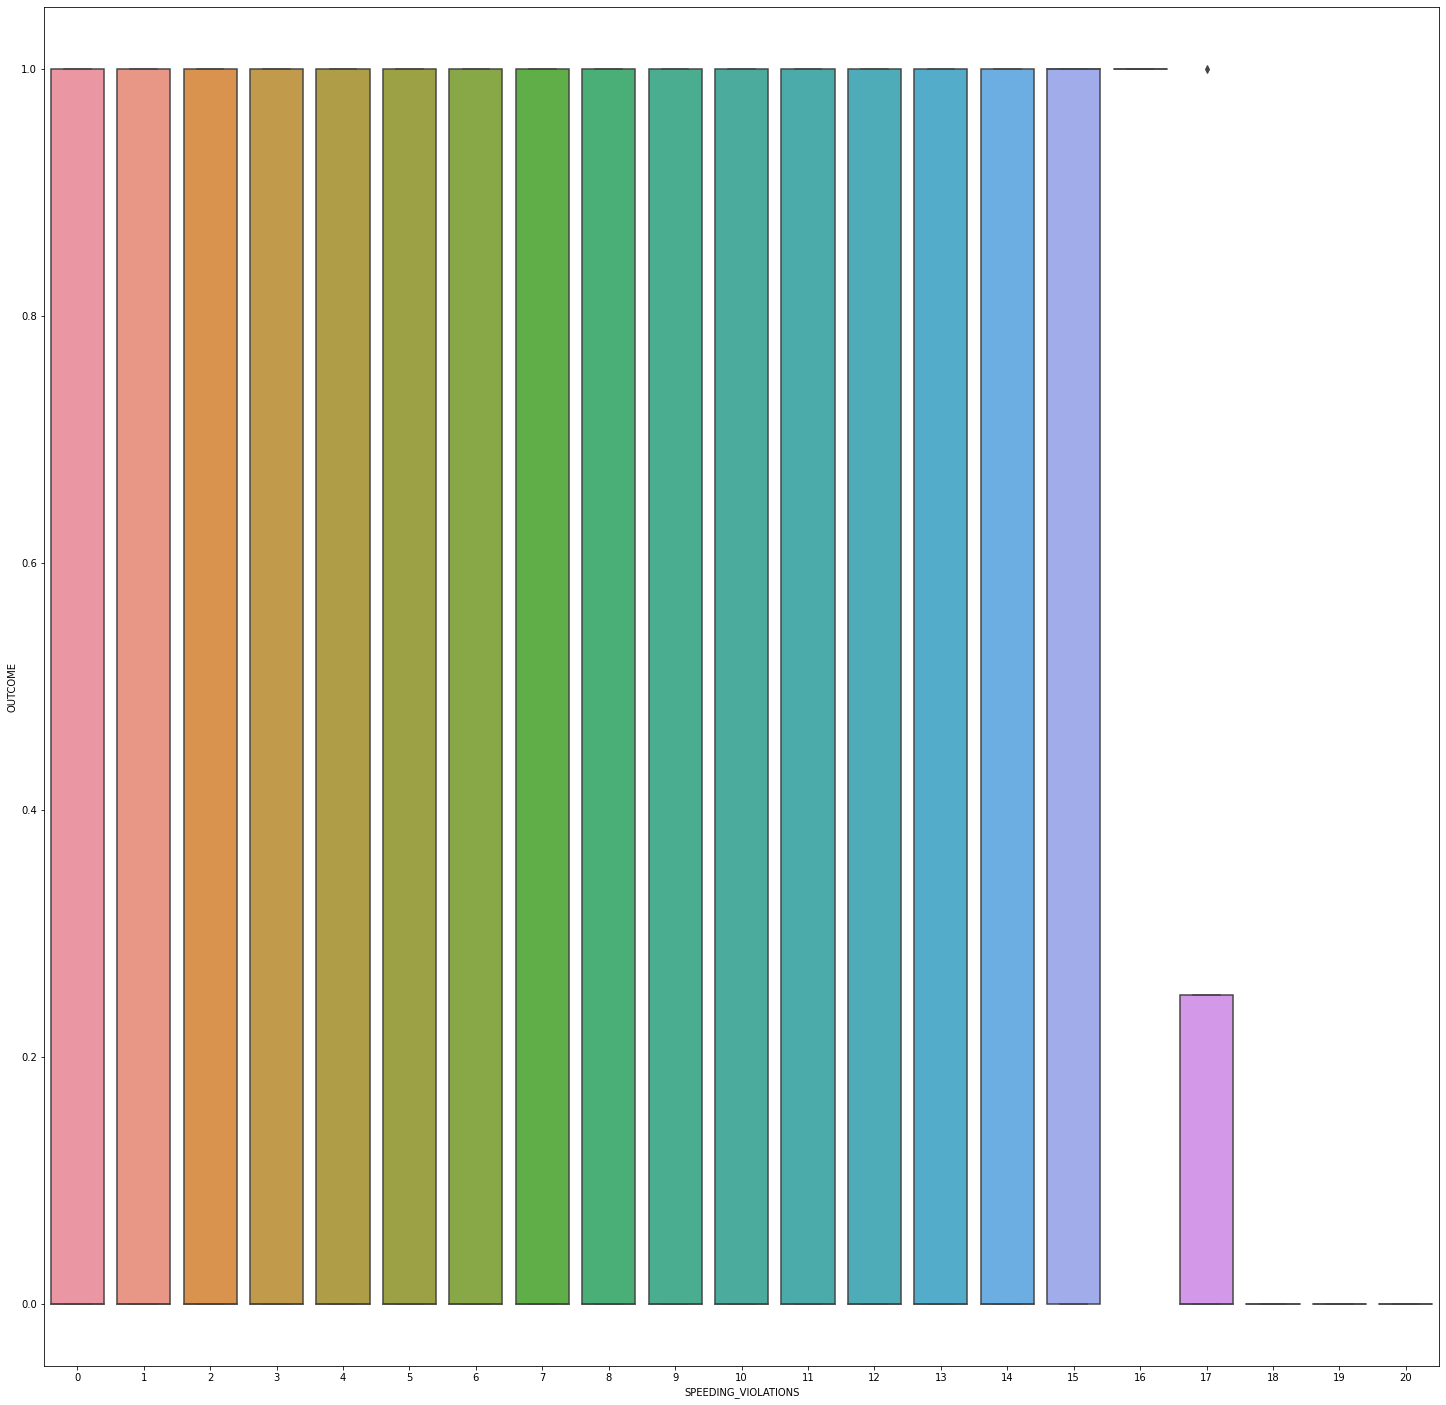

In [239]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[13], y = 'OUTCOME');

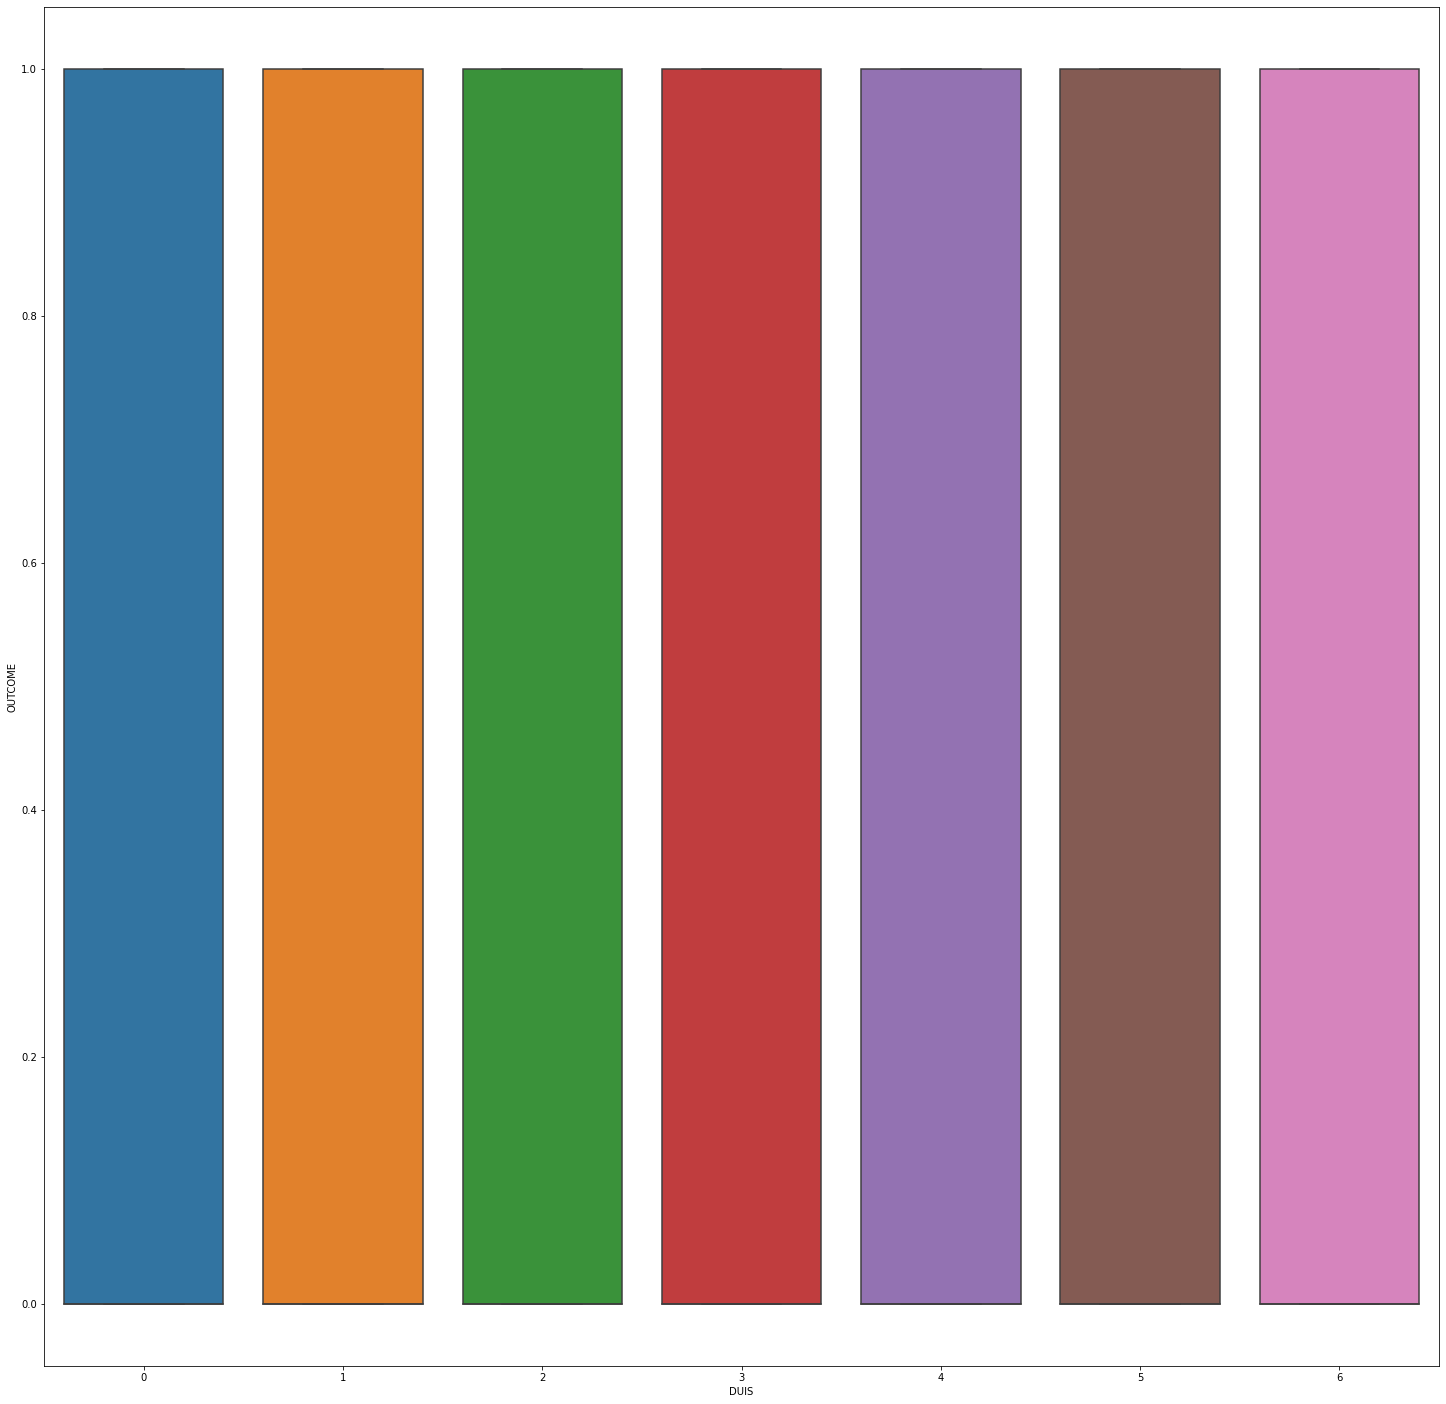

In [240]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[14], y = 'OUTCOME');

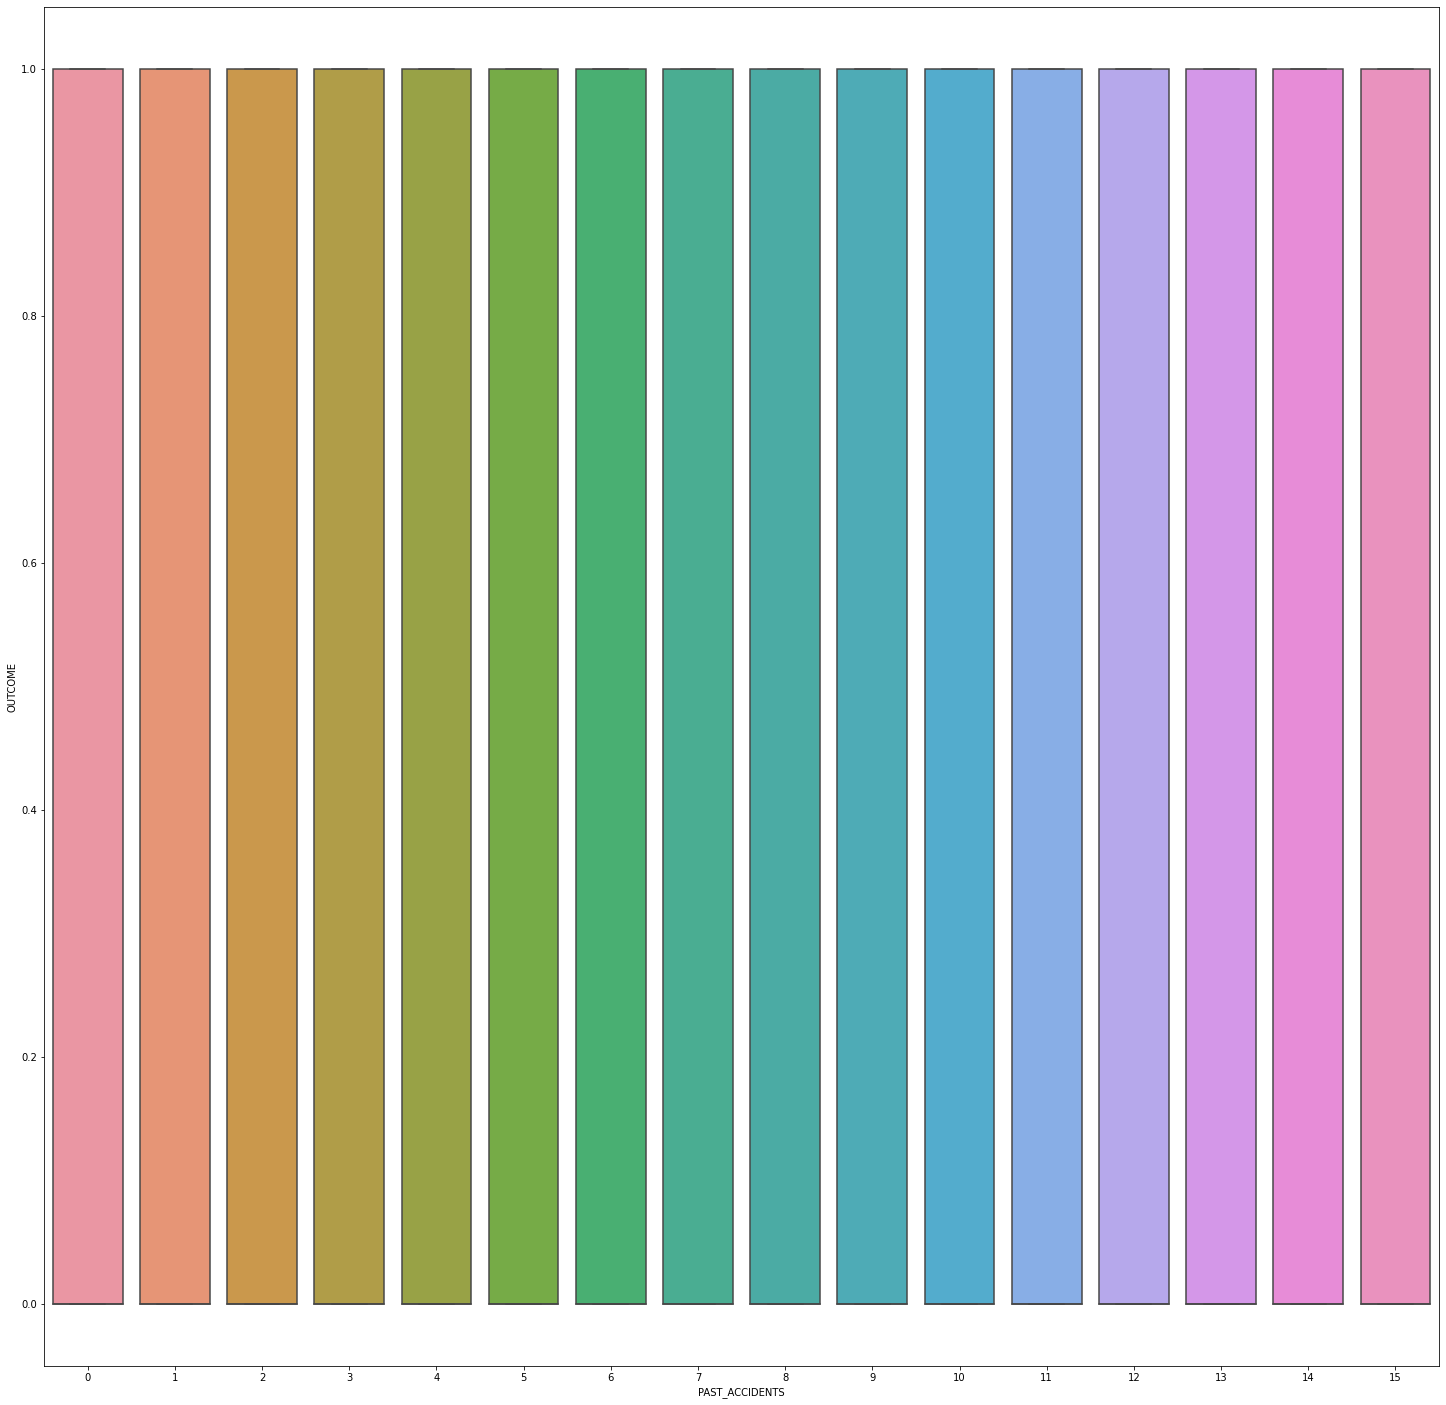

In [241]:
fig = plt.figure(figsize=(25, 25))
ax=sns.boxplot(data = tr, x = inp_features[15], y = 'OUTCOME');

# Scatter Plot

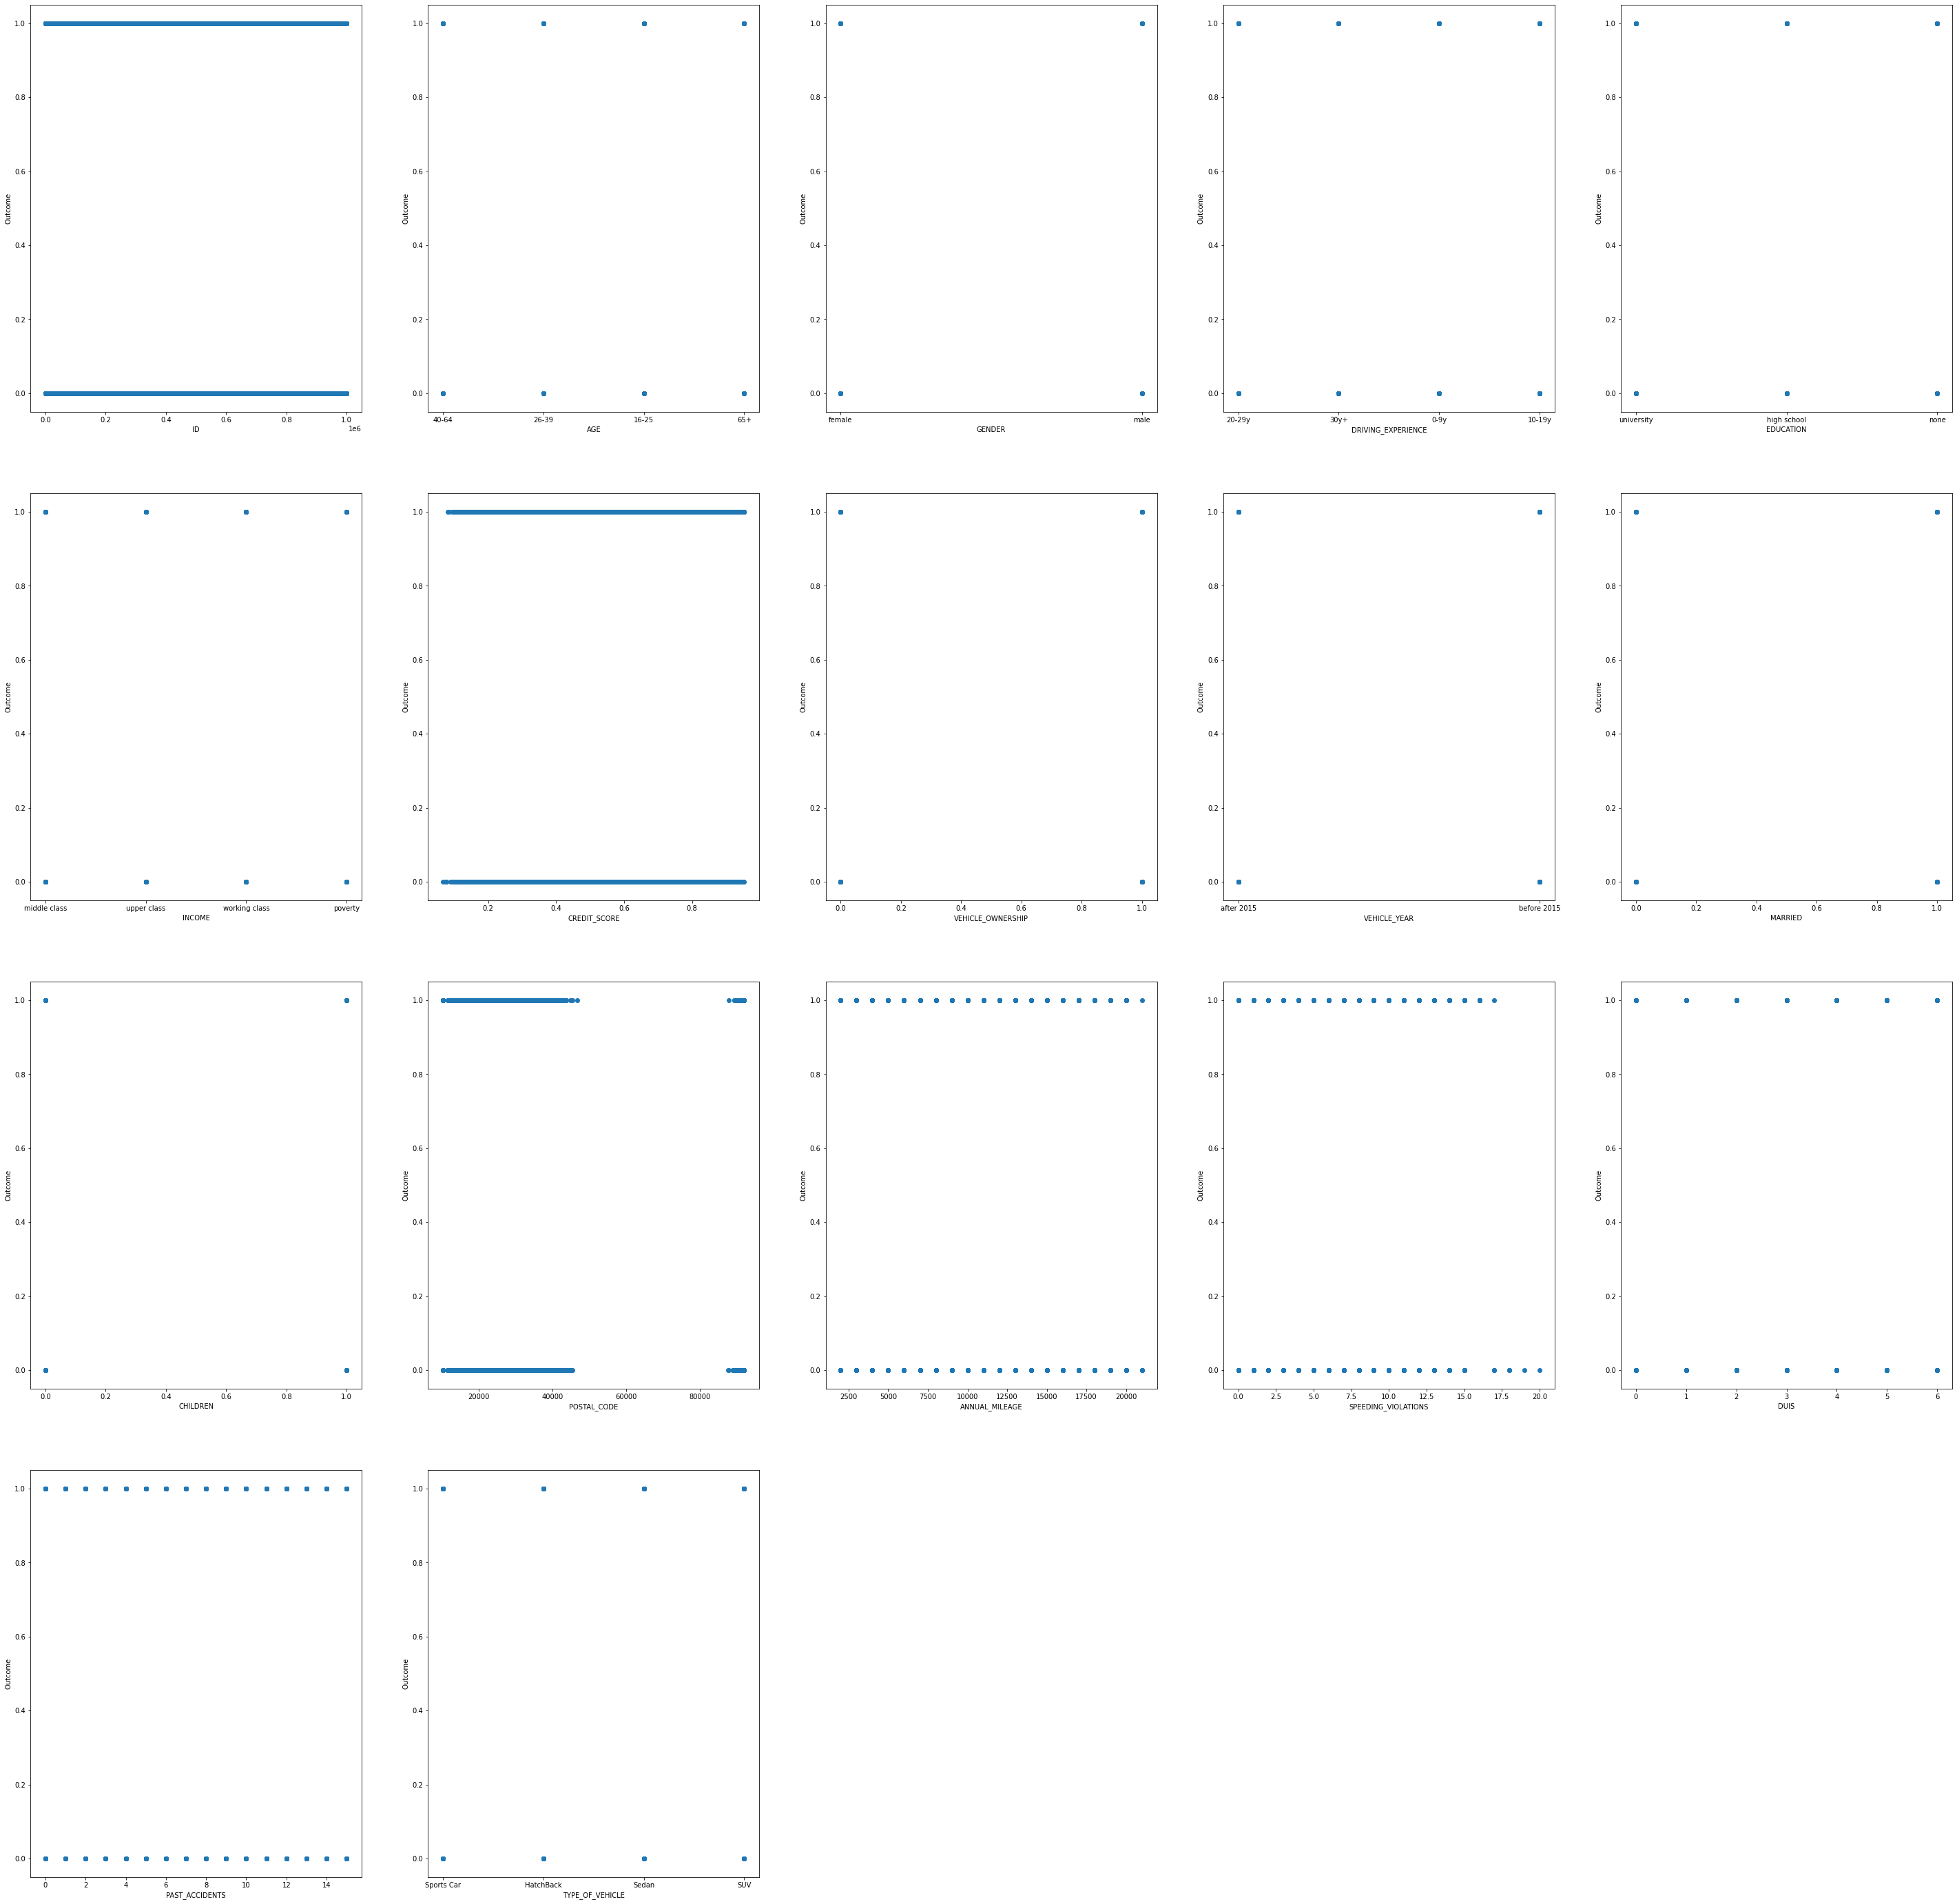

In [242]:
ig = plt.figure(figsize = (50,50))

for i in range(len(inp_features)):
    plt.subplot(4,5,i+1)
    plt.xlabel(inp_features[i])
    plt.ylabel("Outcome")
    plt.scatter(x = tr[inp_features[i]], y = tr['OUTCOME'])

# Multivariate Plot

# PairPlot

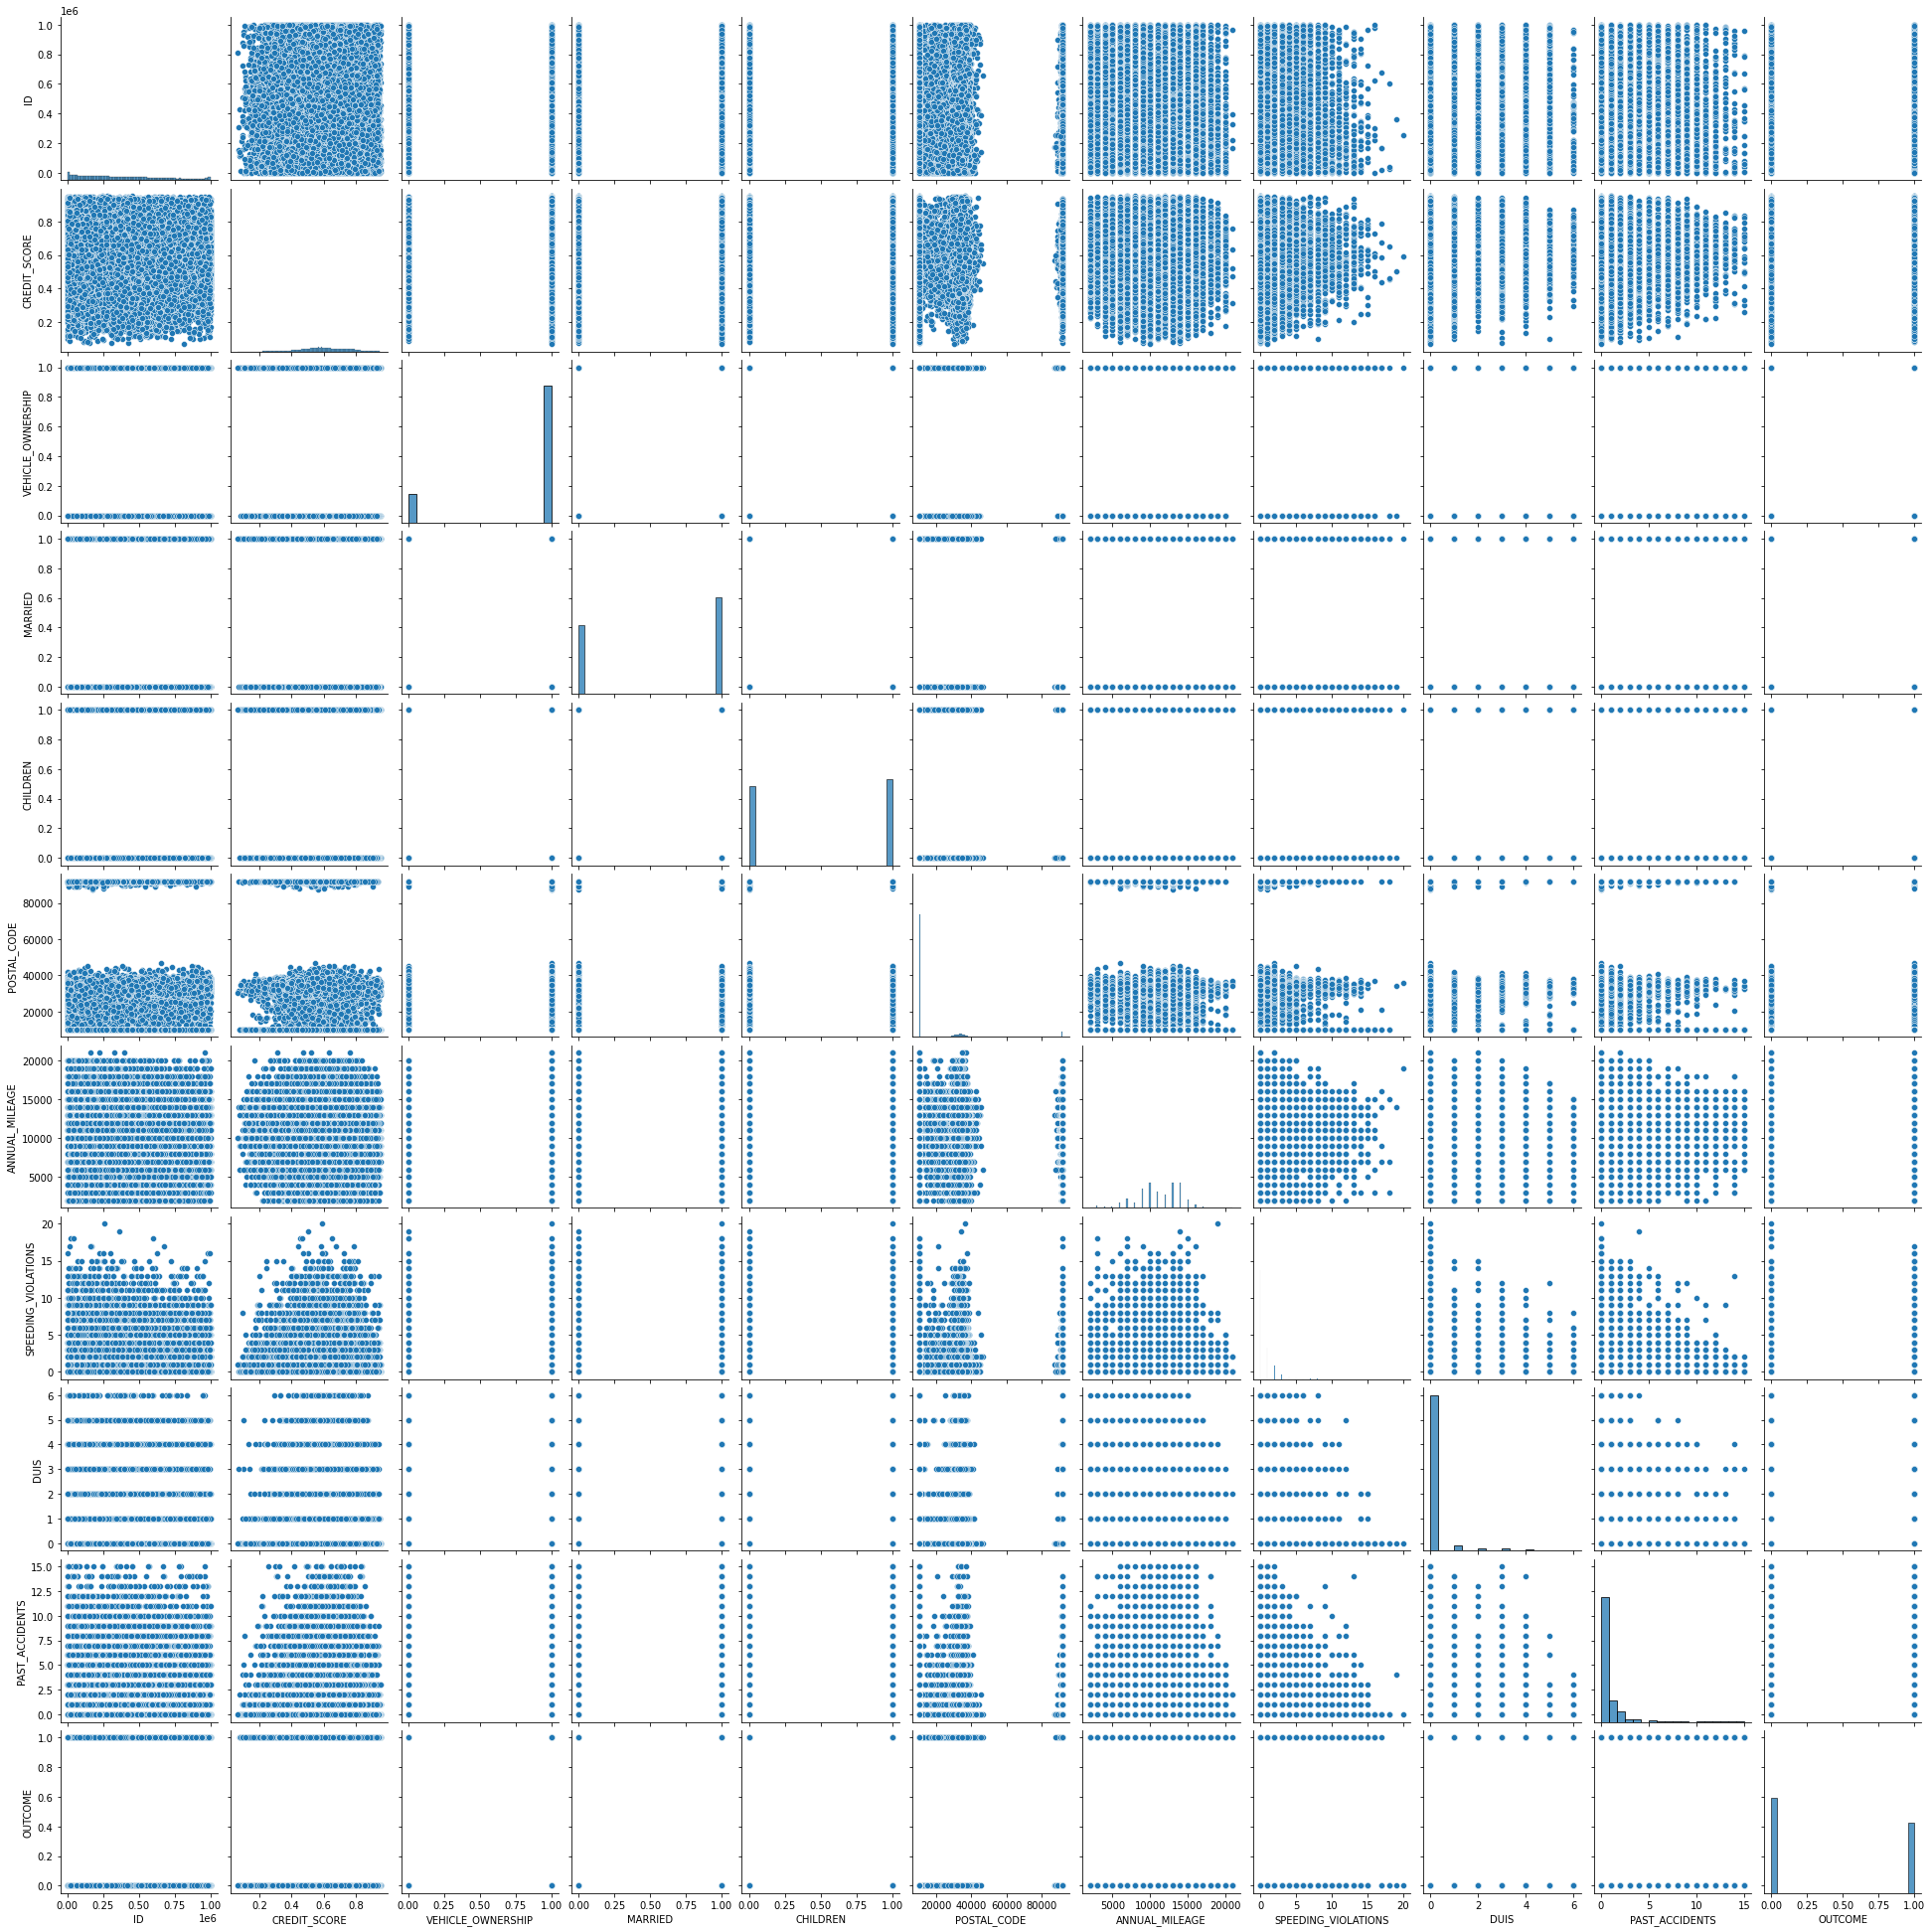

In [243]:
sns.pairplot(tr)

In [244]:
tr.skew().sort_values(ascending = False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


DUIS                   5.608688
PAST_ACCIDENTS         4.345520
SPEEDING_VIOLATIONS    3.899817
POSTAL_CODE            2.986882
ID                     0.448392
OUTCOME                0.313184
CHILDREN              -0.080065
CREDIT_SCORE          -0.226358
MARRIED               -0.341446
ANNUAL_MILEAGE        -0.510118
VEHICLE_OWNERSHIP     -1.729404
dtype: float64

# Feature Transformation

In [245]:
tr['VEHICLE_OWNERSHIP'] = tr['VEHICLE_OWNERSHIP'].astype('object')
te['VEHICLE_OWNERSHIP'] = te['VEHICLE_OWNERSHIP'].astype('object')

tr['CHILDREN'] = tr['CHILDREN'].astype('object')
te['CHILDREN'] = te['CHILDREN'].astype('object')

tr['MARRIED'] = tr['MARRIED'].astype('object')
te['MARRIED'] = te['MARRIED'].astype('object')

tr['OUTCOME'] = tr['OUTCOME'].astype('int')

In [246]:
cat_feat = tr.select_dtypes(include = ["object"]).columns.to_list()
cat_feat

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'TYPE_OF_VEHICLE']

In [247]:
tr = pd.get_dummies(tr, columns = cat_feat, drop_first = True)
te = pd.get_dummies(te, columns = cat_feat, drop_first = True)

In [248]:
tr.describe()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_26-39,AGE_40-64,...,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_OWNERSHIP_1.0,VEHICLE_YEAR_before 2015,MARRIED_1.0,CHILDREN_1.0,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,...,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.00000,105000.000000
mean,394931.295905,0.602173,18045.439267,11061.228571,0.675676,0.129733,0.549314,0.422648,0.190648,0.321105,...,0.138448,0.488295,0.232895,0.827038,0.547724,0.584143,0.520000,0.165600,0.26781,0.329448
std,279694.106053,0.138045,16709.040449,2972.355482,1.383678,0.589714,1.402809,0.493983,0.392814,0.466903,...,0.345371,0.499865,0.422678,0.378216,0.497720,0.492871,0.499602,0.371723,0.44282,0.470015
min,101.000000,0.066880,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,156351.750000,0.514876,10238.000000,9000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,354679.500000,0.601112,10238.000000,11000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000
75%,598602.250000,0.703216,22957.750000,13000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000
max,999976.000000,0.954075,92101.000000,21000.000000,20.000000,6.000000,15.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [249]:
tr

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_26-39,AGE_40-64,...,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_OWNERSHIP_1.0,VEHICLE_YEAR_before 2015,MARRIED_1.0,CHILDREN_1.0,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,816393,0.638050,37379,11000.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,251762,0.475741,10238,9000.0,0,0,0,1,1,0,...,0,0,0,1,1,1,0,0,0,0
2,481952,0.839817,10238,12000.0,0,0,0,1,0,1,...,0,0,0,1,1,1,1,0,1,0
3,3506,0.682527,92099,6000.0,1,0,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
4,498013,0.572184,32122,15000.0,0,0,1,0,0,1,...,0,0,1,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,19557,0.672255,31885,9000.0,2,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
104996,222459,0.514193,32277,10000.0,0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,1,0
104997,83089,0.461942,34800,11000.0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
104998,984879,0.483571,10238,10000.0,0,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,0


In [250]:
tr['POSTAL_CODE'] = tr['POSTAL_CODE'].astype('str')
te['POSTAL_CODE'] = te['POSTAL_CODE'].astype('str')

In [251]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          105000 non-null  int64  
 1   CREDIT_SCORE                105000 non-null  float64
 2   POSTAL_CODE                 105000 non-null  object 
 3   ANNUAL_MILEAGE              105000 non-null  float64
 4   SPEEDING_VIOLATIONS         105000 non-null  int64  
 5   DUIS                        105000 non-null  int64  
 6   PAST_ACCIDENTS              105000 non-null  int64  
 7   OUTCOME                     105000 non-null  int64  
 8   AGE_26-39                   105000 non-null  uint8  
 9   AGE_40-64                   105000 non-null  uint8  
 10  AGE_65+                     105000 non-null  uint8  
 11  GENDER_male                 105000 non-null  uint8  
 12  DRIVING_EXPERIENCE_10-19y   105000 non-null  uint8  
 13  DRIVING_EXPERI

In [252]:
tr['POSTAL_CODE_1st_digit']  = tr['POSTAL_CODE'].apply(lambda x: x[0])
te['POSTAL_CODE_1st_digit']  = te['POSTAL_CODE'].apply(lambda x: x[0])

tr['POSTAL_CODE_2nd_digit']  = tr['POSTAL_CODE'].apply(lambda x: x[1])
te['POSTAL_CODE_2nd_digit']  = te['POSTAL_CODE'].apply(lambda x: x[1])

tr['POSTAL_CODE_3rd_digit']  = tr['POSTAL_CODE'].apply(lambda x: x[2])
te['POSTAL_CODE_3rd_digit']  = te['POSTAL_CODE'].apply(lambda x: x[2])

tr['POSTAL_CODE_4th_digit']  = tr['POSTAL_CODE'].apply(lambda x: x[3])
te['POSTAL_CODE_4th_digit']  = te['POSTAL_CODE'].apply(lambda x: x[3])

tr['POSTAL_CODE_5th_digit']  = tr['POSTAL_CODE'].apply(lambda x: x[4])
te['POSTAL_CODE_5th_digit']  = te['POSTAL_CODE'].apply(lambda x: x[4])

In [253]:
tr.drop(['POSTAL_CODE'], axis = 1, inplace = True)
te.drop(['POSTAL_CODE'], axis = 1, inplace = True)

In [254]:
tr.drop(['ID'], axis = 1, inplace = True)
te.drop(['ID'], axis = 1, inplace = True)

In [255]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CREDIT_SCORE                105000 non-null  float64
 1   ANNUAL_MILEAGE              105000 non-null  float64
 2   SPEEDING_VIOLATIONS         105000 non-null  int64  
 3   DUIS                        105000 non-null  int64  
 4   PAST_ACCIDENTS              105000 non-null  int64  
 5   OUTCOME                     105000 non-null  int64  
 6   AGE_26-39                   105000 non-null  uint8  
 7   AGE_40-64                   105000 non-null  uint8  
 8   AGE_65+                     105000 non-null  uint8  
 9   GENDER_male                 105000 non-null  uint8  
 10  DRIVING_EXPERIENCE_10-19y   105000 non-null  uint8  
 11  DRIVING_EXPERIENCE_20-29y   105000 non-null  uint8  
 12  DRIVING_EXPERIENCE_30y+     105000 non-null  uint8  
 13  EDUCATION_none

In [256]:
cat_feat_new = tr.select_dtypes(include = 'object').columns.to_list()
cat_feat_new

['POSTAL_CODE_1st_digit',
 'POSTAL_CODE_2nd_digit',
 'POSTAL_CODE_3rd_digit',
 'POSTAL_CODE_4th_digit',
 'POSTAL_CODE_5th_digit']

In [257]:
tr = pd.get_dummies(tr, columns = cat_feat_new, drop_first = True)
te = pd.get_dummies(te, columns = cat_feat_new, drop_first = True)

In [258]:
tr.columns

Index(['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME', 'AGE_26-39', 'AGE_40-64', 'AGE_65+',
       'GENDER_male', 'DRIVING_EXPERIENCE_10-19y', 'DRIVING_EXPERIENCE_20-29y',
       'DRIVING_EXPERIENCE_30y+', 'EDUCATION_none', 'EDUCATION_university',
       'INCOME_poverty', 'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_OWNERSHIP_1.0', 'VEHICLE_YEAR_before 2015', 'MARRIED_1.0',
       'CHILDREN_1.0', 'TYPE_OF_VEHICLE_SUV', 'TYPE_OF_VEHICLE_Sedan',
       'TYPE_OF_VEHICLE_Sports Car', 'POSTAL_CODE_1st_digit_2',
       'POSTAL_CODE_1st_digit_3', 'POSTAL_CODE_1st_digit_4',
       'POSTAL_CODE_1st_digit_8', 'POSTAL_CODE_1st_digit_9',
       'POSTAL_CODE_2nd_digit_1', 'POSTAL_CODE_2nd_digit_2',
       'POSTAL_CODE_2nd_digit_3', 'POSTAL_CODE_2nd_digit_4',
       'POSTAL_CODE_2nd_digit_5', 'POSTAL_CODE_2nd_digit_6',
       'POSTAL_CODE_2nd_digit_7', 'POSTAL_CODE_2nd_digit_8',
       'POSTAL_CODE_2nd_digit_9', 'POSTAL_CODE_3rd_d

In [259]:
te.columns

Index(['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'AGE_26-39', 'AGE_40-64', 'AGE_65+', 'GENDER_male',
       'DRIVING_EXPERIENCE_10-19y', 'DRIVING_EXPERIENCE_20-29y',
       'DRIVING_EXPERIENCE_30y+', 'EDUCATION_none', 'EDUCATION_university',
       'INCOME_poverty', 'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_OWNERSHIP_1.0', 'VEHICLE_YEAR_before 2015', 'MARRIED_1.0',
       'CHILDREN_1.0', 'TYPE_OF_VEHICLE_SUV', 'TYPE_OF_VEHICLE_Sedan',
       'TYPE_OF_VEHICLE_Sports Car', 'POSTAL_CODE_1st_digit_2',
       'POSTAL_CODE_1st_digit_3', 'POSTAL_CODE_1st_digit_4',
       'POSTAL_CODE_1st_digit_8', 'POSTAL_CODE_1st_digit_9',
       'POSTAL_CODE_2nd_digit_1', 'POSTAL_CODE_2nd_digit_2',
       'POSTAL_CODE_2nd_digit_3', 'POSTAL_CODE_2nd_digit_4',
       'POSTAL_CODE_2nd_digit_5', 'POSTAL_CODE_2nd_digit_6',
       'POSTAL_CODE_2nd_digit_7', 'POSTAL_CODE_2nd_digit_8',
       'POSTAL_CODE_2nd_digit_9', 'POSTAL_CODE_3rd_digit_1',
  

In [260]:
train = tr.copy()
test = te.copy()

Hyperparameter Tuning(Takes too much time for execution)

In [261]:
# logModel = LogisticRegression()
# param_grid = [    
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4, 4, 10),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [1000]
#     }
# ]
# # X_train, X_val, y_train, y_val = train_test_split(
# #     X, y, random_state=42
# # )
# clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, n_jobs=-1)
# best_clf = clf.fit(X,y)
# best_clf.best_estimator_

C=0.046415888336127774, max_iter=1000, solver='newton-cg' (Obtained Best hyperparameters for logistic Regression model using GridSearchCV)

# Model Building

In [ ]:
X = train.drop(['OUTCOME'], axis = 1)
y = train['OUTCOME']
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

cv_score = []
pred_test_full = []
i = 1
# X = X[selected_features]
# test = test[selected_features]
for train_index, test_index in skf.split(X, y):
    print("{} of KFold {}".format(i, skf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    sc = StandardScaler()
    nc = MinMaxScaler()
    xt = sc.fit_transform(xtr)
    xv = sc.transform(xvl)
    t = sc.transform(test)
    xtr = pd.DataFrame(nc.fit_transform(xt), columns = xtr.columns)
    xvl = pd.DataFrame(nc.transform(xv), columns = xvl.columns)
    te_df = pd.DataFrame(nc.transform(t), columns = test.columns)

    model = LogisticRegression(random_state = 42, n_jobs = -1,C=0.046415888336127774, max_iter=1000, solver='newton-cg')

    model.fit(xtr, ytr)
    score = log_loss(yvl, model.predict_proba(xvl)[:, 1])
    print("Log Loss = ", score)
    cv_score.append(score)
    i += 1
    pred_test = model.predict_proba(te_df)[:,1]
    pred_test_full.append(pred_test)

1 of KFold 10
Log Loss =  0.681524699247759
2 of KFold 10


In [ ]:
print("MEAN CV = ",np.mean(cv_score))
print("Deviation = ", np.std(cv_score))
print("Final max. local CV = ", np.mean(cv_score) + np.std(cv_score))
print("Final min. local CV = ", np.mean(cv_score) - np.std(cv_score))
# print("Final PUBLIC CV = ", np.mean(cv_score) + np.std(cv_score) + 0.04833)

In [ ]:
med_preds = np.median(pred_test_full, axis = 0)
mean_preds = np.mean(pred_test_full, axis = 0)

In [ ]:
sample['OUTCOME'] = mean_preds
sample.to_csv('lr_final_tuned_mean.csv', index = False)

In [ ]:
sample['OUTCOME'] = med_preds
sample.to_csv('lr_final_tuned_median.csv', index = False)